**ID A1812**

**Submission Date : 11/05/2019**

# House Prices: Advanced Regression Techniques

# Abstract:
House Price prediction is a very popular dataset for data science competition. In this dataset 79 explanatory variables describing (almost) every aspect of residential homes in Ames and Iowa. This competition challenges competitor to predict the final price of each home.

In this report my main focus is how artificial neural network performs for this kind of problems and how to improve performance of the prediction using artificial neural network.  So my elaboration on that section will be much more detailed.I have divided my work in four part and they are 
- <b> Data processing</b> where I have visualized, cleaned, handled missing data, carefully modified , removed and merged some features.
- <b> Testing multiple model </b> In this part I have used gradient boosting, decision tree, random forest regression , lasso and Artificial neural network on my pre processed data.
- <b> Artificial neural network implementation </b> In this section I have implemented ANN , performed parameter tuning, training, used grid search inside training and validate test score.
- <b> Cross Validation </b> In this part I have used k fold cross validation on my artificial neural network model to make sure if the Data is actually independent and to fine tune few parameters on whole dataset if the cross validation score is not same as validation score.
- <b> Ensemble learning </b> I have used bagging method for this section to improve my kaggle score.

# Score:
### Best Score : 0.12192 (using Ensemble Learning)
<img src="img/kaggle_score.png"> 

#### Best score without Ensemble : 0.12324 (ANN only)
<img src="img/ann_base.png">

# Imports:

#### Gpu testing

In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import  r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from IPython.display import Image
from sklearn.preprocessing import normalize,MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import seaborn as sns
# %matplotlib widget
%matplotlib inline

# Data Pre-processing

### Load Data

In [3]:
train = pd.read_csv('train.csv')#.select_dtypes(exclude=['object'])
test = pd.read_csv('test.csv')#.select_dtypes(exclude=['object'])

#look into datatypes of the file
print("data types count")
train.dtypes.groupby(train.dtypes).count()


data types count


int64      35
float64     3
object     43
dtype: int64

### Looking into data

In [4]:
print('show sample')
pd.set_option('display.max_column', None)
train.head()

show sample


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
print('description of data')
train.describe()

description of data


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


This function shows scatter-plot and distribution plot. I am going to use it to see few of the features of the dataset and observe how it changes while I process the data. I will try not to remove data so instead of removing any data point I will observe them until all my data processing is complete. If I found out after all the processing some data points are really causing problem then I will drop it.

In [6]:
 # A FUNCTION THAT SHOWS SCATTER-PLOT AND DISTRIBUTION-PLOT
def outlier_check_plot(column):
    plt.subplots(figsize=(19, 5))
    # SCATTER PLOT OF THE 19 HIGHEST-VALUES OF A COLUMN
    plt.subplot(1, 3, 1)
    plt.scatter(x = train[column].sort_values(ascending=False)[:19], y = train.Id[:19], color='red', label='Train' )
    plt.scatter(x = test[column].sort_values(ascending=False)[:19], y = test.Id[:19], label='Test')
    plt.ylabel('Serial Number', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 1: 19 highest-values of category {} \n in both train and test dataset'.format(column))
    plt.legend(loc='center',fontsize=13)
    # DISTRIBUTION-PLOT OF THE COLUMN
    plt.subplot(1, 3, 2)
    sns.distplot(train[column],color='red', rug=True, hist=False, label='Train')
    sns.distplot(test[column], rug=True, hist=False, label='Test')
    plt.ylabel('Distribution', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 2: Distribution-plot of category {} \n for both train and test dataset'.format(column))
    plt.legend(fontsize=13)
    # SCATTER-PLOT OF THE COLUMN WITH RESPECT TO SALEPRICE
    plt.subplot(1, 3, 3)
    plt.scatter(x = train[column], y = train.SalePrice)
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 3: Scatter-plot of train-category {} \n with respect to SalePrice'.format(column))
    plt.show()


Before outlier-removal of 1stFlrSF: 


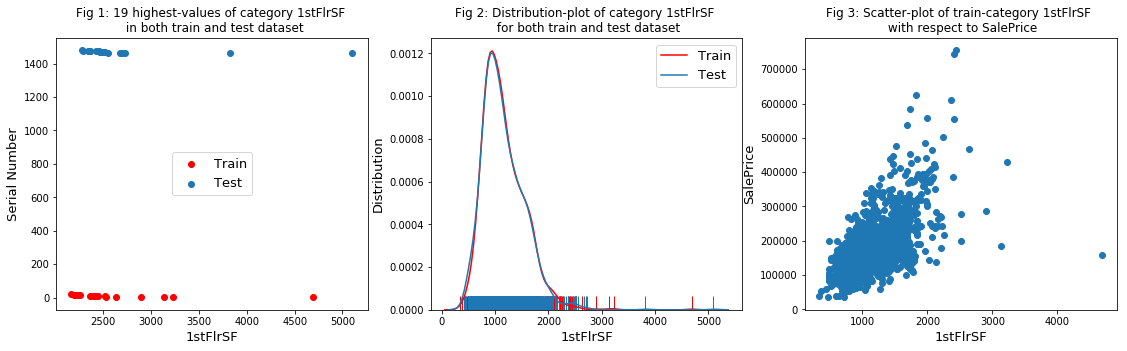

In [7]:
print('Before outlier-removal of 1stFlrSF: ')
outlier_check_plot('1stFlrSF')


We can see one value in train set that is highly contradictory with SalePrice (1stFlrSF is too high but SalePrice is too low). And there is only one such high-value
point available in test dataset. So we might want to remove this outlier.

Before outlier-removal of BsmtFinSF1: 


/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


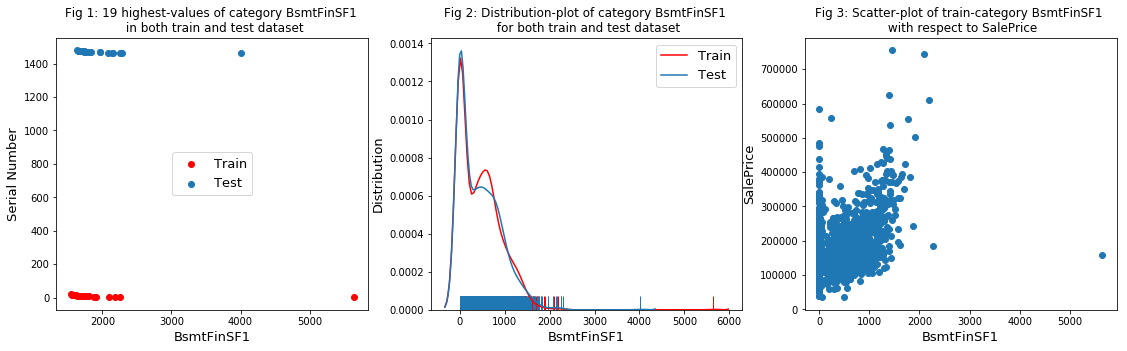

In [8]:
print('Before outlier-removal of BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')


We can also see the same outlier here. 

Before outlier-removal of LotArea: 


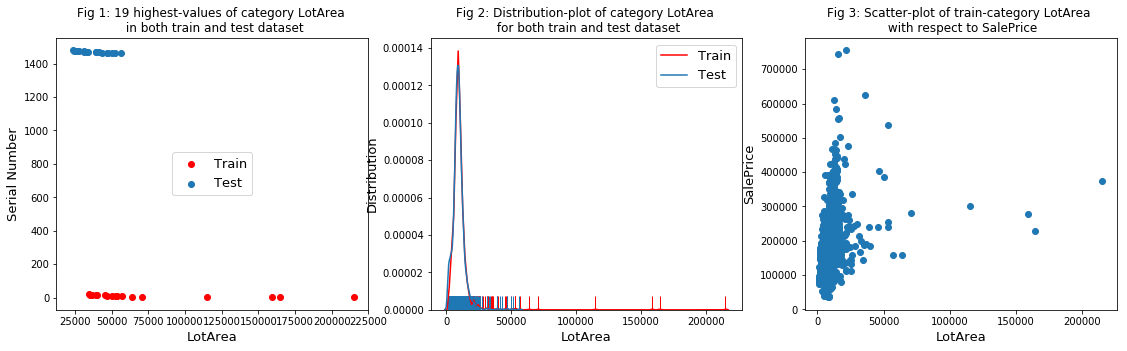

In [9]:
print('Before outlier-removal of LotArea: ')
outlier_check_plot('LotArea')


We can see in Fig 3 that there are 4 LotArea train-samples above 80000 that are very high in size but comperatively very low in SalePrice. Also there are no such
values present in test-data: Fig 1. So we can drop them


Before outlier-removal of GrLivArea: 


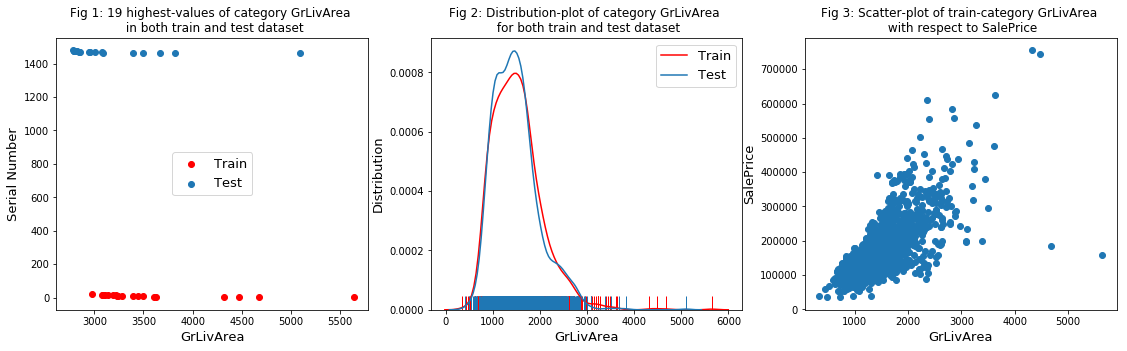

In [10]:
print('Before outlier-removal of GrLivArea: ')
outlier_check_plot('GrLivArea')


If we compare Fig. 3 with code-cell 13 we can see that two outliers are already common in GrLivArea. These two outliers of GrLivArea train-samples were above
4000 with very low SalePrice (below 300000). We are seeing same outlier again and again.


Before outlier-removal of MasVnrArea: 


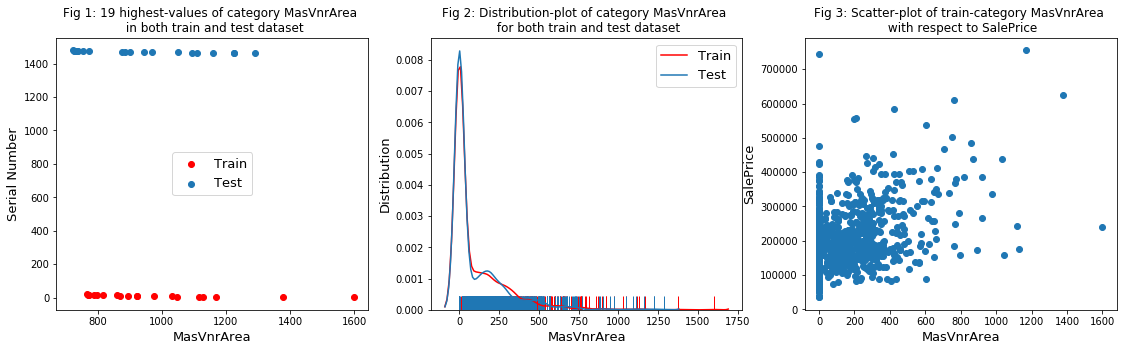

In [11]:
print('Before outlier-removal of MasVnrArea: ')
outlier_check_plot('MasVnrArea')


As we can see in Fig 3 that above 1500 there is 1 MasVnrArea train-samples that are very high in size but comperatively very low in SalePrice (below 300000) and
there is no such values present in test-data: Fig 1. But this case is not so common outlier in other sections so keeping it would be safe for now.

Before outlier-removal of LotFrontage: 


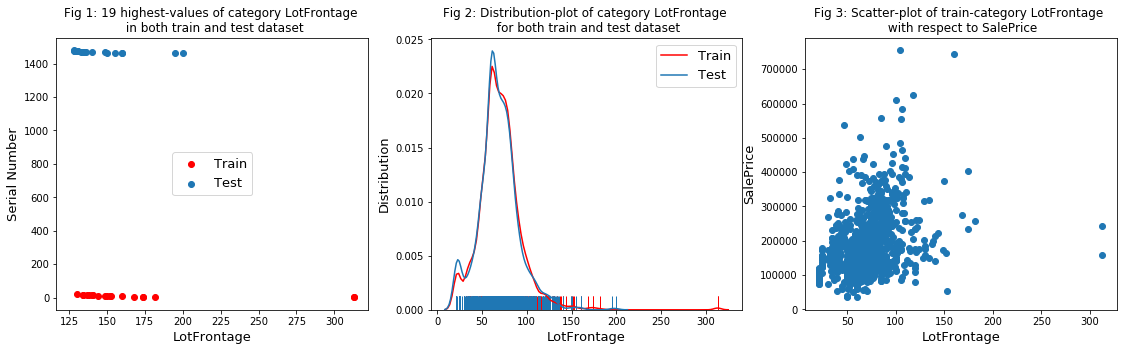

In [12]:
print('Before outlier-removal of LotFrontage: ')
outlier_check_plot('LotFrontage')


As we can see in Fig 3 that above 200 there is 1 LotFrontage train-samples that is very high in size but comperatively very low in SalePrice (below 300000) and
there is no such value present in test-data. But one of them seems to be the common outlier which is below 20000(saleprice). We should remove the common one and observe the other.


Before outlier-removal of TotalBsmtSF: 


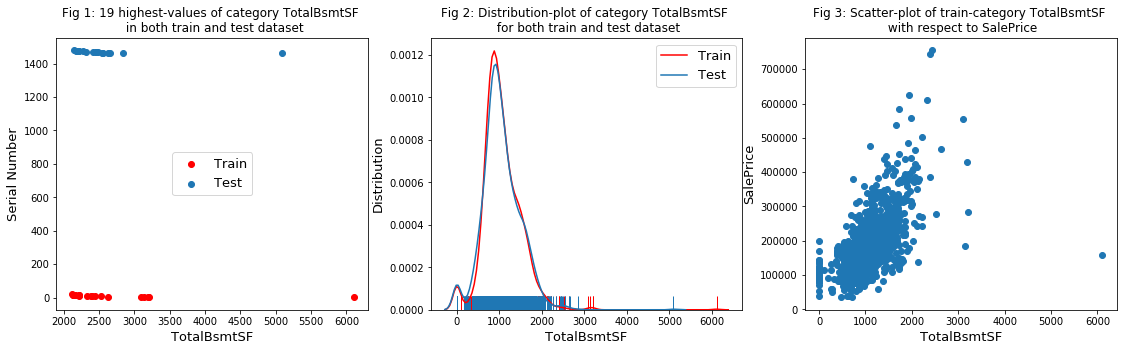

In [13]:
print('Before outlier-removal of TotalBsmtSF: ')
outlier_check_plot('TotalBsmtSF')


We can also see the common outlier and we would be removing the common outlier in the next section.

### Common Outlier Remove

#### Saleprice vs GrLivArea

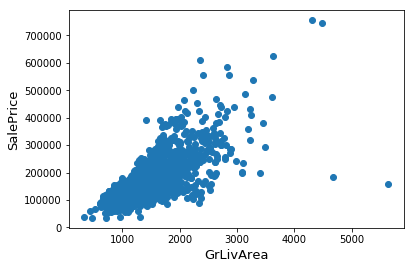

In [14]:

fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

 There are a few houses with more than 4000 sq ft living area that are
 outliers, so we drop them from the training data.

In [15]:
train.drop(train[ (train["GrLivArea"] > 4000) & (train['SalePrice']<400000) ].index, inplace=True)

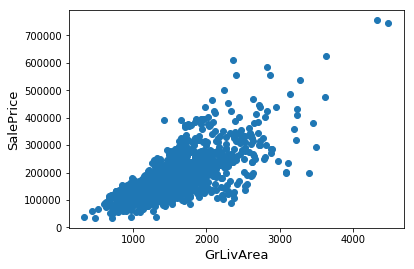

In [16]:
#Check the graph again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

Its a linear relation so this feature is helpful to predict the price.

#### SalePrice vs TotalBsmSf

This relationship is also linear so we can expect that it also have great impact on the price.

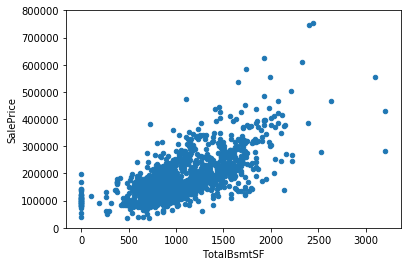

In [17]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

We have removed the common outlier and now the graph seems better and we will follow up later after all the data pre processing. If any outlier remains after all processing I will remove them. 

### Relationship with categorical features

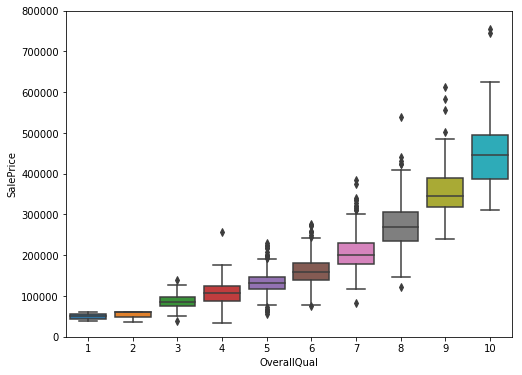

In [18]:
#box plot overallqual/saleprice
import seaborn as sns

var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

As expected saleprice increases when overall quality increases.

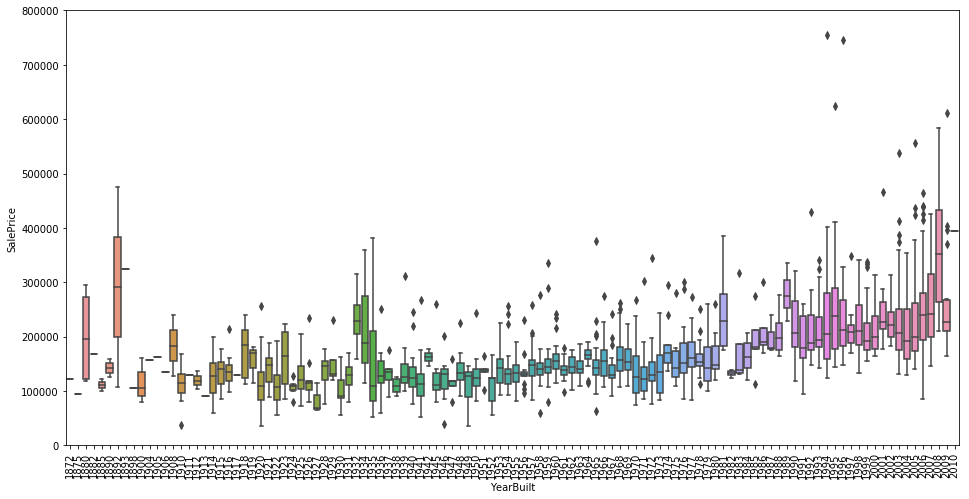

In [19]:
var = 'YearBuilt'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We can see that people tends to spend more for newly built houses. Although its does not seems really a storong feature acording to plot but its really importent if we consider other parameters too. 

### Note
- 'GrLivArea' and 'TotalBsmtSF' seem to be linearly related with 'SalePrice'. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of 'TotalBsmtSF', we can see that the slope of the linear relationship is particularly high.
- 'OverallQual' and 'YearBuilt' also seem to be related with 'SalePrice'. The relationship seems to be stronger in the case of 'OverallQual', where the box plot shows how sales prices increase with the overall quality.

We have analised  four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (feature selection) and not the definition of complex relationships between them (feature engineering).

## Correlation matrix (heatmap style)

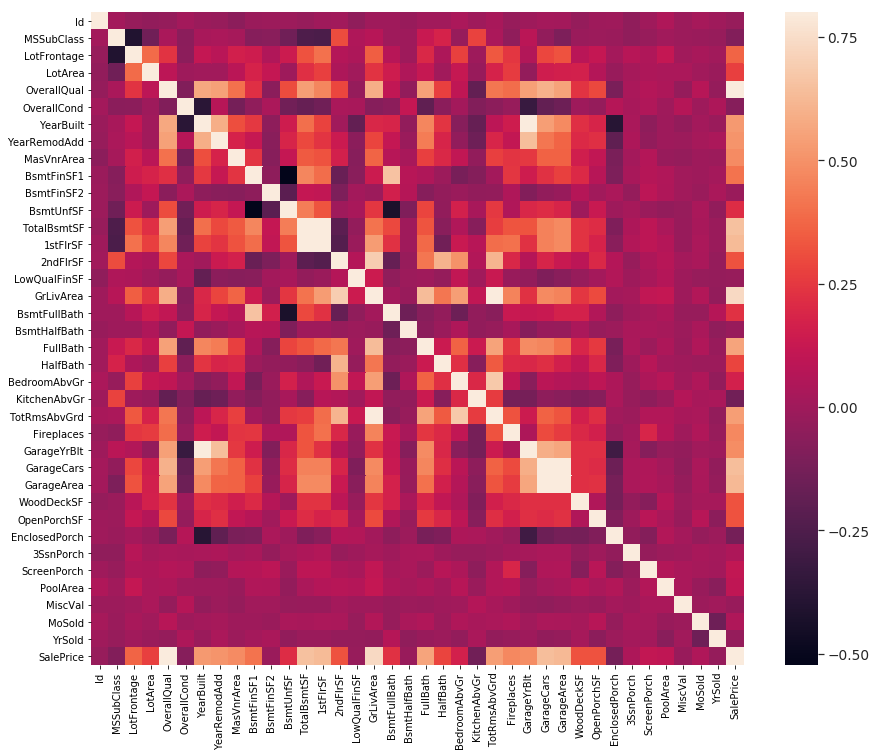

In [20]:
#correlation matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, vmax=.8, square=True);

In my opinion, this heatmap is the best way to get a quick overview the relationships of a dataset. 

At first sight, there are two red colored squares that get my attention. The first one refers to the 'TotalBsmtSF' and '1stFlrSF' variables, and the second one refers to the 'GarageX' variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs. Heatmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the 'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' is closely related to salePrice, but we can also see many other variables that should be taken into account. So we are zooming in. 

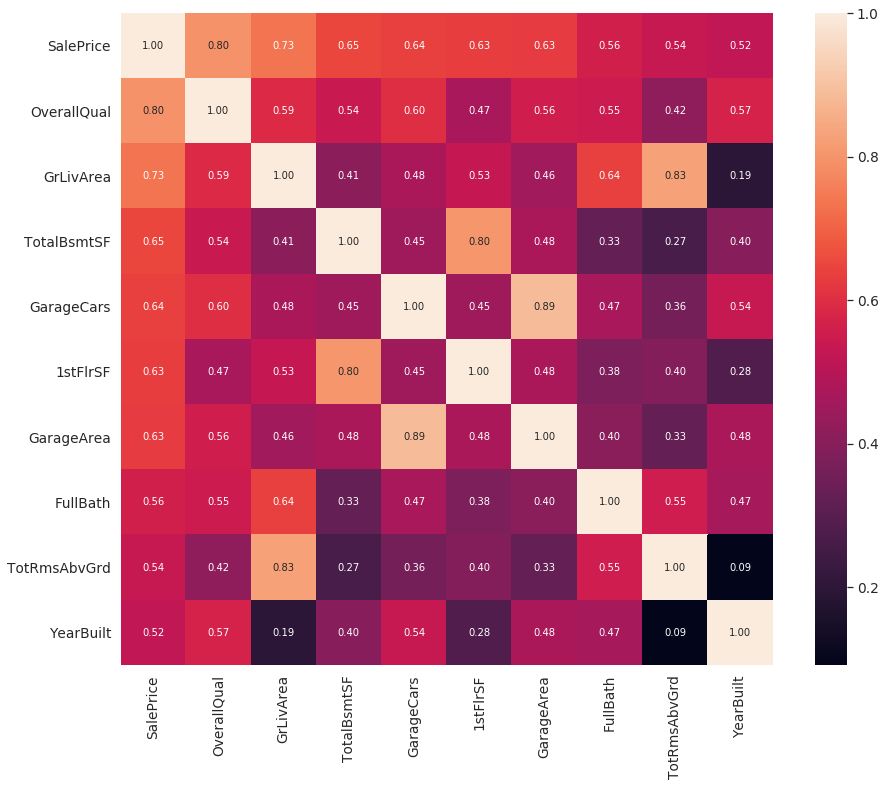

In [21]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

#### Explanation 
- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice'.
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables.The number of cars that fit into the garage is a consequence of the garage area. 'GarageCars' and 'GarageArea' are really close.Therefore, we just need one of these variables in our analysis (we can keep 'GarageCars' since its correlation with 'SalePrice' is higher).

- 'TotalBsmtSF' and '1stFloor' also seem to be really close. We can keep 'TotalBsmtSF'
- 'FullBath' is really seems to be a important features.
- 'TotRmsAbvGrd' and 'GrLivArea' also seems very close we will decide later which to keep.
- 'YearBuilt' is slightly correlated with 'SalePrice'. 

## RMSE

In [22]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))


## Missing Data

Important questions when thinking about missing data:

- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hiding an inconvenient truth.

In [23]:

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageCond,81,0.055556
GarageType,81,0.055556
GarageYrBlt,81,0.055556
GarageFinish,81,0.055556


## Imputing missing data
Two of these following part would be used in the common data processing section to impute missing data.

In [24]:
lot_frontage_by_neighborhood = train["LotFrontage"].groupby(train["Neighborhood"])

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

def factorize(df, factor_df, column, fill_na=None):
    factor_df[column] = df[column]
    if fill_na is not None:
        factor_df[column].fillna(fill_na, inplace=True)
    le.fit(factor_df[column].unique())
    factor_df[column] = le.transform(factor_df[column])
    return factor_df

## common data processing:
In this part we have label encoded some of the columns because some features are ordinal. I have replaced some null value with zero because in those case they probably meant that it may not exist . Finally I have merged some of the features to get a better feature. 

<b> Befor starting following block its important to understand which feature means what so that describing my work would be easier </b>

- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
-    LandSlope: Slope of property
-    Neighborhood: Physical locations within Ames city limits
-    Condition1: Proximity to main road or railroad
-    Condition2: Proximity to main road or railroad (if a second is present)
-    BldgType: Type of dwelling
-    HouseStyle: Style of dwelling
-    OverallQual: Overall material and finish quality
-    OverallCond: Overall condition rating
-    YearBuilt: Original construction date
-    YearRemodAdd: Remodel date
-    RoofStyle: Type of roof
-    RoofMatl: Roof material
-    Exterior1st: Exterior covering on house
-    Exterior2nd: Exterior covering on house (if more than one material)
-    MasVnrType: Masonry veneer type
-    MasVnrArea: Masonry veneer area in square feet
-    ExterQual: Exterior material quality
-    ExterCond: Present condition of the material on the exterior
-    Foundation: Type of foundation
-    BsmtQual: Height of the basement
-    BsmtCond: General condition of the basement
-    BsmtExposure: Walkout or garden level basement walls
-    BsmtFinType1: Quality of basement finished area
-    BsmtFinSF1: Type 1 finished square feet
-    BsmtFinType2: Quality of second finished area (if present)
-    BsmtFinSF2: Type 2 finished square feet
-    BsmtUnfSF: Unfinished square feet of basement area
-    TotalBsmtSF: Total square feet of basement area
-    Heating: Type of heating
-    HeatingQC: Heating quality and condition
-    CentralAir: Central air conditioning
-    Electrical: Electrical system
-    1stFlrSF: First Floor square feet
-    2ndFlrSF: Second floor square feet
-    LowQualFinSF: Low quality finished square feet (all floors)
-    GrLivArea: Above grade (ground) living area square feet
-    BsmtFullBath: Basement full bathrooms
-    BsmtHalfBath: Basement half bathrooms
-   FullBath: Full bathrooms above grade
-  HalfBath: Half baths above grade
-   Bedroom: Number of bedrooms above basement level
-  Kitchen: Number of kitchens
-  KitchenQual: Kitchen quality
-  TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
-    -GarageType: Garage location
-    GarageYrBlt: Year garage was built
-    GarageFinish: Interior finish of the garage
-    GarageCars: Size of garage in car capacity
-    GarageArea: Size of garage in square feet
-    GarageQual: Garage quality
-    GarageCond: Garage condition
-    PavedDrive: Paved driveway
-    WoodDeckSF: Wood deck area in square feet
-    OpenPorchSF: Open porch area in square feet
-    EnclosedPorch: Enclosed porch area in square feet
-    3SsnPorch: Three season porch area in square feet
-    ScreenPorch: Screen porch area in square feet
-    PoolArea: Pool area in square feet
-    PoolQC: Pool quality
-    Fence: Fence quality
-   MiscFeature: Miscellaneous feature not covered in other categories
-   MiscVal: $Value of miscellaneous feature
-    MoSold: Month Sold
-    YrSold: Year Sold
-    SaleType: Type of sale
-    SaleCondition: Condition of sale

In [26]:
def data_process(df):
    all_df = pd.DataFrame(index = df.index)

    all_df["LotFrontage"] = df["LotFrontage"]   
    for key, group in lot_frontage_by_neighborhood:
        #Filling in missing LotFrontage values by the median
        idx = (df["Neighborhood"] == key) & (df["LotFrontage"].isnull())
        all_df.loc[idx, "LotFrontage"] = group.median()    
        all_df["LotArea"] = df["LotArea"]

    all_df["MasVnrArea"] = df["MasVnrArea"]
    all_df["MasVnrArea"].fillna(0, inplace=True)
   
    all_df["BsmtFinSF1"] = df["BsmtFinSF1"]
    all_df["BsmtFinSF1"].fillna(0, inplace=True)

    all_df["BsmtFinSF2"] = df["BsmtFinSF2"]
    all_df["BsmtFinSF2"].fillna(0, inplace=True)

    all_df["BsmtUnfSF"] = df["BsmtUnfSF"]
    all_df["BsmtUnfSF"].fillna(0, inplace=True)

    all_df["TotalBsmtSF"] = df["TotalBsmtSF"]
    all_df["TotalBsmtSF"].fillna(0, inplace=True)

    all_df["1stFlrSF"] = df["1stFlrSF"]
    all_df["2ndFlrSF"] = df["2ndFlrSF"]
    all_df["GrLivArea"] = df["GrLivArea"]
    
    all_df["GarageArea"] = df["GarageArea"]
    all_df["GarageArea"].fillna(0, inplace=True)

    all_df["WoodDeckSF"] = df["WoodDeckSF"]
    all_df["OpenPorchSF"] = df["OpenPorchSF"]
    all_df["EnclosedPorch"] = df["EnclosedPorch"]
    all_df["3SsnPorch"] = df["3SsnPorch"]
    all_df["ScreenPorch"] = df["ScreenPorch"]
    
    all_df["BsmtFullBath"] = df["BsmtFullBath"]
    all_df["BsmtFullBath"].fillna(0, inplace=True)

    all_df["BsmtHalfBath"] = df["BsmtHalfBath"]
    all_df["BsmtHalfBath"].fillna(0, inplace=True)

    all_df["FullBath"] = df["FullBath"] 
    all_df["HalfBath"] = df["HalfBath"] 
    all_df["BedroomAbvGr"] = df["BedroomAbvGr"] 
    all_df["KitchenAbvGr"] = df["KitchenAbvGr"] 
    all_df["TotRmsAbvGrd"] = df["TotRmsAbvGrd"] 
    all_df["Fireplaces"] = df["Fireplaces"] 

    all_df["GarageCars"] = df["GarageCars"]
    all_df["GarageCars"].fillna(0, inplace=True)

    all_df["CentralAir"] = (df["CentralAir"] == "Y") * 1.0
   
    all_df["OverallQual"] = df["OverallQual"]
    all_df["OverallCond"] = df["OverallCond"]

    
    """following case are ordinal so we are performing label encoding here"""
    
    nan = float('nan')
    qual_dict = {nan: 0, "NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}
    all_df["ExterQual"] = df["ExterQual"].map(qual_dict).astype(int)
    all_df["ExterCond"] = df["ExterCond"].map(qual_dict).astype(int)
    all_df["BsmtQual"] = df["BsmtQual"].map(qual_dict).astype(int)
    all_df["BsmtCond"] = df["BsmtCond"].map(qual_dict).astype(int)
    all_df["HeatingQC"] = df["HeatingQC"].map(qual_dict).astype(int)
    all_df["KitchenQual"] = df["KitchenQual"].map(qual_dict).astype(int)
    all_df["FireplaceQu"] = df["FireplaceQu"].map(qual_dict).astype(int)
    all_df["GarageQual"] = df["GarageQual"].map(qual_dict).astype(int)
    all_df["GarageCond"] = df["GarageCond"].map(qual_dict).astype(int)

    all_df["BsmtExposure"] = df["BsmtExposure"].map(
        {nan: 0, "No": 1, "Mn": 2, "Av": 3, "Gd": 4}).astype(int)

    bsmt_fin_dict = {nan: 0, "Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}
    all_df["BsmtFinType1"] = df["BsmtFinType1"].map(bsmt_fin_dict).astype(int)
    all_df["BsmtFinType2"] = df["BsmtFinType2"].map(bsmt_fin_dict).astype(int)

    all_df["Functional"] = df["Functional"].map(
        {nan: 0, "Sal": 1, "Sev": 2, "Maj2": 3, "Maj1": 4, 
         "Mod": 5, "Min2": 6, "Min1": 7, "Typ": 8}).astype(int)

    all_df["GarageFinish"] = df["GarageFinish"].map(
        {nan: 0, "Unf": 1, "RFn": 2, "Fin": 3}).astype(int)

    all_df["Fence"] = df["Fence"].map(
        {nan: 0, "MnWw": 1, "GdWo": 2, "MnPrv": 3, "GdPrv": 4}).astype(int)

    all_df["PoolQC"] = df["PoolQC"].map(qual_dict).astype(int)
    
    all_df["YearBuilt"] = df["YearBuilt"]
    all_df["YearRemodAdd"] = df["YearRemodAdd"]

    all_df["GarageYrBlt"] = df["GarageYrBlt"]
    all_df["GarageYrBlt"].fillna(0.0, inplace=True)

    all_df["MoSold"] = df["MoSold"]
    all_df["YrSold"] = df["YrSold"]
    
    all_df["LowQualFinSF"] = df["LowQualFinSF"]
    all_df["MiscVal"] = df["MiscVal"]

    all_df["PoolQC"] = df["PoolQC"].map(qual_dict).astype(int)

    all_df["PoolArea"] = df["PoolArea"]
    all_df["PoolArea"].fillna(0, inplace=True)
    
    # Add categorical features as numbers too. It seems to help a bit.
    all_df = factorize(df, all_df, "MSSubClass")
    all_df = factorize(df, all_df, "MSZoning", "RL")
    all_df = factorize(df, all_df, "LotConfig")
    all_df = factorize(df, all_df, "Neighborhood")
    all_df = factorize(df, all_df, "Condition1")
    all_df = factorize(df, all_df, "BldgType")
    all_df = factorize(df, all_df, "HouseStyle")
    all_df = factorize(df, all_df, "RoofStyle")
    all_df = factorize(df, all_df, "Exterior1st", "Other")
    all_df = factorize(df, all_df, "Exterior2nd", "Other")
    all_df = factorize(df, all_df, "MasVnrType", "None")
    all_df = factorize(df, all_df, "Foundation")
    all_df = factorize(df, all_df, "SaleType", "Oth")
    all_df = factorize(df, all_df, "SaleCondition")

    """In following code I am converting values of those features as 0 or 1"""
    
    # IR2 and IR3 don't appear that often, so just make a distinction
    # between regular and irregular.
    all_df["IsRegularLotShape"] = (df["LotShape"] == "Reg") * 1

    # Most properties are level; bin the other possibilities together
    # as "not level".
    all_df["IsLandLevel"] = (df["LandContour"] == "Lvl") * 1

    # Most land slopes are gentle; treat the others as "not gentle".
    all_df["IsLandSlopeGentle"] = (df["LandSlope"] == "Gtl") * 1

    # Most properties use standard circuit breakers.
    all_df["IsElectricalSBrkr"] = (df["Electrical"] == "SBrkr") * 1

    # About 2/3rd have an attached garage.
    all_df["IsGarageDetached"] = (df["GarageType"] == "Detchd") * 1

    # Most have a paved drive. Treat dirt/gravel and partial pavement
    # as "not paved".
    all_df["IsPavedDrive"] = (df["PavedDrive"] == "Y") * 1

    # The only interesting "misc. feature" is the presence of a shed.
    all_df["HasShed"] = (df["MiscFeature"] == "Shed") * 1.  

    # If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
    all_df["Remodeled"] = (all_df["YearRemodAdd"] != all_df["YearBuilt"]) * 1
    
    # Did a remodeling happen in the year the house was sold?
    all_df["RecentRemodel"] = (all_df["YearRemodAdd"] == all_df["YrSold"]) * 1
    
    # Was this house sold in the year it was built?
    all_df["VeryNewHouse"] = (all_df["YearBuilt"] == all_df["YrSold"]) * 1

    all_df["Has2ndFloor"] = (all_df["2ndFlrSF"] == 0) * 1
    all_df["HasMasVnr"] = (all_df["MasVnrArea"] == 0) * 1
    all_df["HasWoodDeck"] = (all_df["WoodDeckSF"] == 0) * 1
    all_df["HasOpenPorch"] = (all_df["OpenPorchSF"] == 0) * 1
    all_df["HasEnclosedPorch"] = (all_df["EnclosedPorch"] == 0) * 1
    all_df["Has3SsnPorch"] = (all_df["3SsnPorch"] == 0) * 1
    all_df["HasScreenPorch"] = (all_df["ScreenPorch"] == 0) * 1
    
    # Months with the largest number of deals may be significant.
#     mx = max(train["MoSold"].groupby(train["MoSold"]).count())
#     all_df["HighSeason"] = df["MoSold"].replace(
#         train["MoSold"].groupby(train["MoSold"]).count()/mx)

#     mx = max(train["MSSubClass"].groupby(train["MSSubClass"]).count())
#     all_df["NewerDwelling"] = df["MSSubClass"].replace(
#         train["MSSubClass"].groupby(train["MSSubClass"]).count()/mx)  

    # following portion was calculated with above commented part of the code.
    # Instead of the fraction value putting binary value helps for generalization 
    all_df["HighSeason"] = df["MoSold"].replace( 
        {1: 0, 2: 0, 3: 0, 4: 1, 5: 1, 6: 1, 7: 1, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0})

    all_df["NewerDwelling"] = df["MSSubClass"].replace(
        {20: 1, 30: 0, 40: 0, 45: 0,50: 0, 60: 1, 70: 0, 75: 0, 80: 0, 85: 0,
         90: 0, 120: 1, 150: 0, 160: 0, 180: 0, 190: 0})   
    
    
    all_df.loc[df.Neighborhood == 'NridgHt', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'Crawfor', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'StoneBr', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'Somerst', "Neighborhood_Good"] = 1
    all_df.loc[df.Neighborhood == 'NoRidge', "Neighborhood_Good"] = 1
    all_df["Neighborhood_Good"].fillna(0, inplace=True)
    
    # House completed before sale or not
    all_df["SaleCondition_PriceDown"] = df.SaleCondition.replace(
        {'Abnorml': 1, 'Alloca': 1, 'AdjLand': 1, 'Family': 1, 'Normal': 0, 'Partial': 0})

    # House completed before sale or not
    all_df["BoughtOffPlan"] = df.SaleCondition.replace(
        {"Abnorml" : 0, "Alloca" : 0, "AdjLand" : 0, "Family" : 0, "Normal" : 0, "Partial" : 1})
    
    all_df["BadHeating"] = df.HeatingQC.replace(
        {'Ex': 0, 'Gd': 0, 'TA': 0, 'Fa': 1, 'Po': 1})

    area_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 
                 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'LowQualFinSF', 'PoolArea' ]
    all_df["TotalArea"] = all_df[area_cols].sum(axis=1)

    all_df["TotalArea1st2nd"] = all_df["1stFlrSF"] + all_df["2ndFlrSF"]

    all_df["Age"] = 2010 - all_df["YearBuilt"]
    all_df["TimeSinceSold"] = 2010 - all_df["YrSold"]

    all_df["SeasonSold"] = all_df["MoSold"].map({12:0, 1:0, 2:0, 3:1, 4:1, 5:1, 
                                                  6:2, 7:2, 8:2, 9:3, 10:3, 11:3}).astype(int)
    
    all_df["YearsSinceRemodel"] = all_df["YrSold"] - all_df["YearRemodAdd"]
    
    # Simplifications of existing features into bad/average/good.
    all_df["SimplOverallQual"] = all_df.OverallQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
    all_df["SimplOverallCond"] = all_df.OverallCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2, 7 : 3, 8 : 3, 9 : 3, 10 : 3})
    all_df["SimplPoolQC"] = all_df.PoolQC.replace(
        {1 : 1, 2 : 1, 3 : 2, 4 : 2})
    all_df["SimplGarageCond"] = all_df.GarageCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplGarageQual"] = all_df.GarageQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFireplaceQu"] = all_df.FireplaceQu.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplFunctional"] = all_df.Functional.replace(
        {1 : 1, 2 : 1, 3 : 2, 4 : 2, 5 : 3, 6 : 3, 7 : 3, 8 : 4})
    all_df["SimplKitchenQual"] = all_df.KitchenQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplHeatingQC"] = all_df.HeatingQC.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplBsmtFinType1"] = all_df.BsmtFinType1.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
    all_df["SimplBsmtFinType2"] = all_df.BsmtFinType2.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2, 6 : 2})
    all_df["SimplBsmtCond"] = all_df.BsmtCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplBsmtQual"] = all_df.BsmtQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplExterCond"] = all_df.ExterCond.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
    all_df["SimplExterQual"] = all_df.ExterQual.replace(
        {1 : 1, 2 : 1, 3 : 1, 4 : 2, 5 : 2})
            
    # Bin by neighborhood (a little arbitrarily). Values were computed by: 
    # train_df["SalePrice"].groupby(train_df["Neighborhood"]).median().sort_values()
    neighborhood_map = {
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "NAmes" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
    }

    all_df["NeighborhoodBin"] = df["Neighborhood"].map(neighborhood_map)
    return all_df

In the above block I have done following operations :

- Filled with 0 for some features like MasVnrArea , GarageArea , TotalBsmtSF etc .According to the documentation of the dataset if these features have any field empty then that means the feature is not available. So I have done this operation according to documentation of the dataset.
- CentralAir feature was given has two field only 'Y' or 'N' so I have converted that to 0 or 1
- For some ordinal features I ave performed lable encoding. Those features are ExterQual , ExterCond, BsmtQual, BsmtCond, HeatingQC, KitchenQual etc
- I have converted some features from categorical to numerical and those features are MSSubClass, MSZoning , LotConfig, RL , LotConfig,Neighborhood, Condition1 ,BldgType,  HouseStyle , HouseStyle, Exterior1st, Other, Exterior2nd, MasVnrType, Foundation, SaleType and SaleCondition

- Converted fields of some Features to 0 or 1 based on the understanding of the dataset and a little bit research. Those features with the changing reasons are given below
    - IsRegularLotShape : Field IR2 and IR3 don't appear that often, so just make a distinction between regular and irregular.
    - IsLandLevel : Most land slopes are gentle; treat the others as "not gentle".
    - IsElectricalSBrkr : Most properties use standard circuit breakers.
    - IsGarageDetached : About 2/3rd have an attached garage.
    - IsPavedDrive : Most have a paved drive. Treat dirt/gravel and partial pavement as "not paved".
    - HasShed : The only interesting "misc. feature" is the presence of a shed.
    - Remodeled : If YearRemodAdd != YearBuilt, then a remodeling took place at some point.
    - RecentRemodel : Did a remodeling happen in the year the house was sold?
    - VeryNewHouse : Was this house sold in the year it was built?
    - sofe other features dont need to describe they are self explanatory Has2ndFloor , HasMasVnr , HasWoodDeck .HasOpenPorch ,HasEnclosedPorch ,Has3SsnPorch , HasScreenPorch
- Simplifications of existing features into bad/average/good. Features : SimplOverallQual, SimplOverallCond, SimplPoolQC ,SimplGarageCond, SimplGarageQual, SimplFireplaceQu ,SimplFunctional ,SimplKitchenQual, SimplHeatingQC ,SimplBsmtFinType1, SimplBsmtFinType2 ,SimplBsmtCond , SimplBsmtQual ,SimplExterCond ,SimplExterQual.

- mapped neighborhood based on their quality.The mapping is as followed:
        "MeadowV" : 0,  #  88000
        "IDOTRR" : 1,   # 103000
        "BrDale" : 1,   # 106000
        "OldTown" : 1,  # 119000
        "Edwards" : 1,  # 119500
        "BrkSide" : 1,  # 124300
        "Sawyer" : 1,   # 135000
        "Blueste" : 1,  # 137500
        "SWISU" : 2,    # 139500
        "NAmes" : 2,    # 140000
        "NPkVill" : 2,  # 146000
        "Mitchel" : 2,  # 153500
        "SawyerW" : 2,  # 179900
        "Gilbert" : 2,  # 181000
        "NWAmes" : 2,   # 182900
        "Blmngtn" : 2,  # 191000
        "CollgCr" : 2,  # 197200
        "ClearCr" : 3,  # 200250
        "Crawfor" : 3,  # 200624
        "Veenker" : 3,  # 218000
        "Somerst" : 3,  # 225500
        "Timber" : 3,   # 228475
        "StoneBr" : 4,  # 278000
        "NoRidge" : 4,  # 290000
        "NridgHt" : 4,  # 315000
        - the number after hash is actually median priece of that location. 


In [27]:
train_processed = data_process(train)
test_processed = data_process(test)

print("shape of train :" , train_processed.shape)
print("shape of test :" , test_processed.shape)


shape of train : (1458, 111)
shape of test : (1459, 111)


Keeping NeighborhoodBin into a temporary DataFrame because we want to use the unscaled version later on (to one-hot encode it). 

In [28]:
# Keeping NeighborhoodBin into a temporary DataFrame because we want to use the
# unscaled version later on (to one-hot encode it). 
neighborhood_bin_train = pd.DataFrame(index = train.index)
neighborhood_bin_train["NeighborhoodBin"] = train_processed["NeighborhoodBin"]
neighborhood_bin_test = pd.DataFrame(index = test.index)
neighborhood_bin_test["NeighborhoodBin"] = test_processed["NeighborhoodBin"]


## Skewness & Normalization

According to Hair et al. (2013), four assumptions should be tested:

- **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

- **Homoscedasticity** -  Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

- **Linearity** - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

Skewness, in basic terms, implies off-centre, so does in statistics, it means lack of symmetry. With the help of skewness, one can identify the shape of the distribution of data.

In the simplest cases, normalization of ratings means adjusting values measured on different scales to a notionally common scale, often prior to averaging.Some types of normalization involve only a rescaling, to arrive at values relative to some size variable.

### skewness train set

In the following part we are looking at skewness of training set and we can see that many features are highly skewed. We will be solving it with log transformation.

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. If the original data follows a log-normal distribution or approximately so, then the log-transformed data follows a normal or near normal distribution.

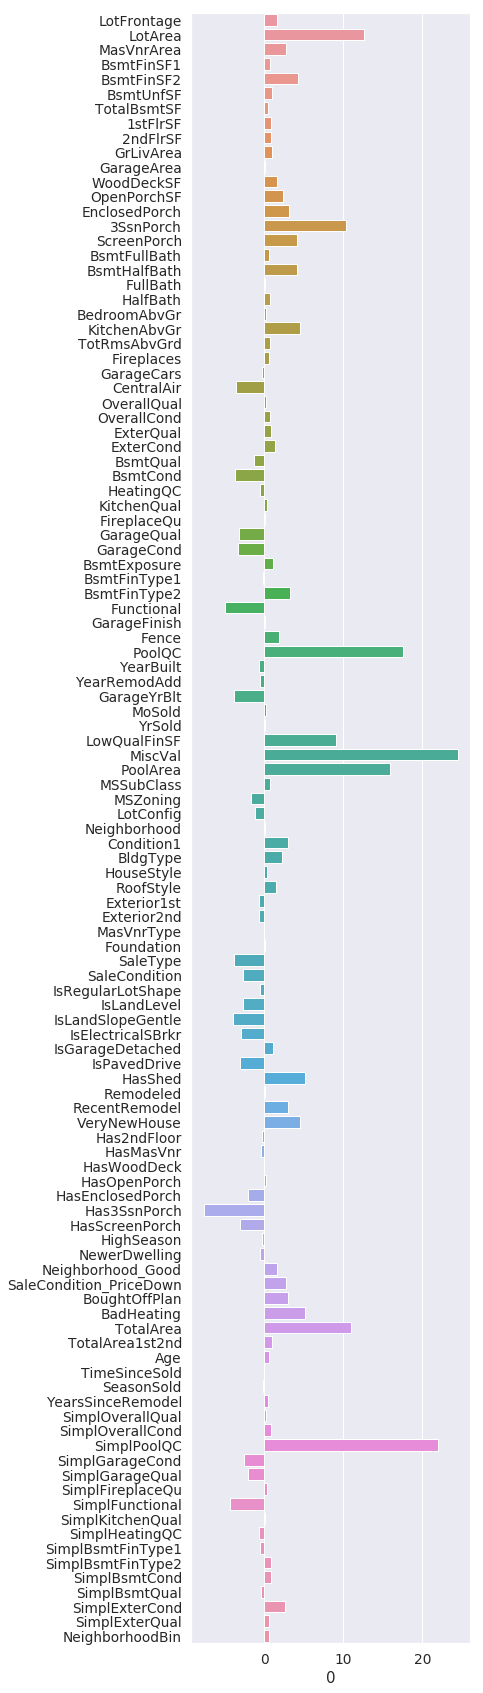

In [29]:
from scipy.stats import skew
import seaborn as sns
numeric_features = train_processed.dtypes[train_processed.dtypes != "object"].index

skewness = train_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)
plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()
# print('skew: ',train_processed[numeric_features].skew())

**Observation**
- A significant number of observations with value zero (houses without basement).
- A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we need to add 1 and then perform log transform operation.
**Note** :
For real-valued input, log1p is accurate also for x so small that 1 + x == 1 in floating-point accuracy.

In [30]:
numeric_features = train_processed.dtypes[train_processed.dtypes != "object"].index

# Transform the skewed numeric features by taking log(feature + 1).
# This will make the features more normal.
from scipy.stats import skew

skewed = train_processed[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[(skewed < -0.75) | (skewed > 0.75)]
skewed = skewed.index

train_processed[skewed] = np.log1p(train_processed[skewed])


# Additional processing: scale the data.   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(train_processed[numeric_features])

for i, col in enumerate(numeric_features):
    train_processed[col] = scaled[:, i]

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


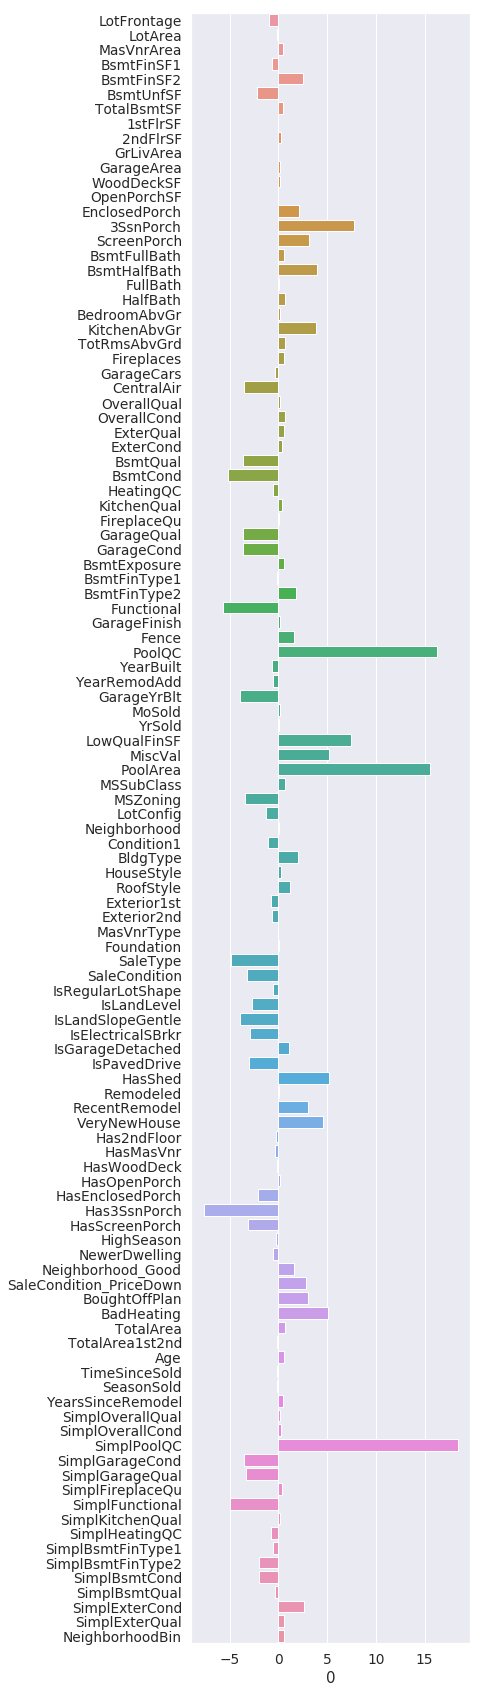

In [31]:
from scipy.stats import skew
numeric_features = train_processed.dtypes[train_processed.dtypes != "object"].index
skewness = train_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)
plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()

We can see that skewness of the following features decreased a lot:
- LotArea
- WoodDeskSf
- OpenPorch
- Extencond
- MiscVal
- TotalArea

But other numeric features also improved its skewness a little bit.

### Test Skewness

We need to perform same operation on given test set too. Otherwise we woun't be able to predict correctly.

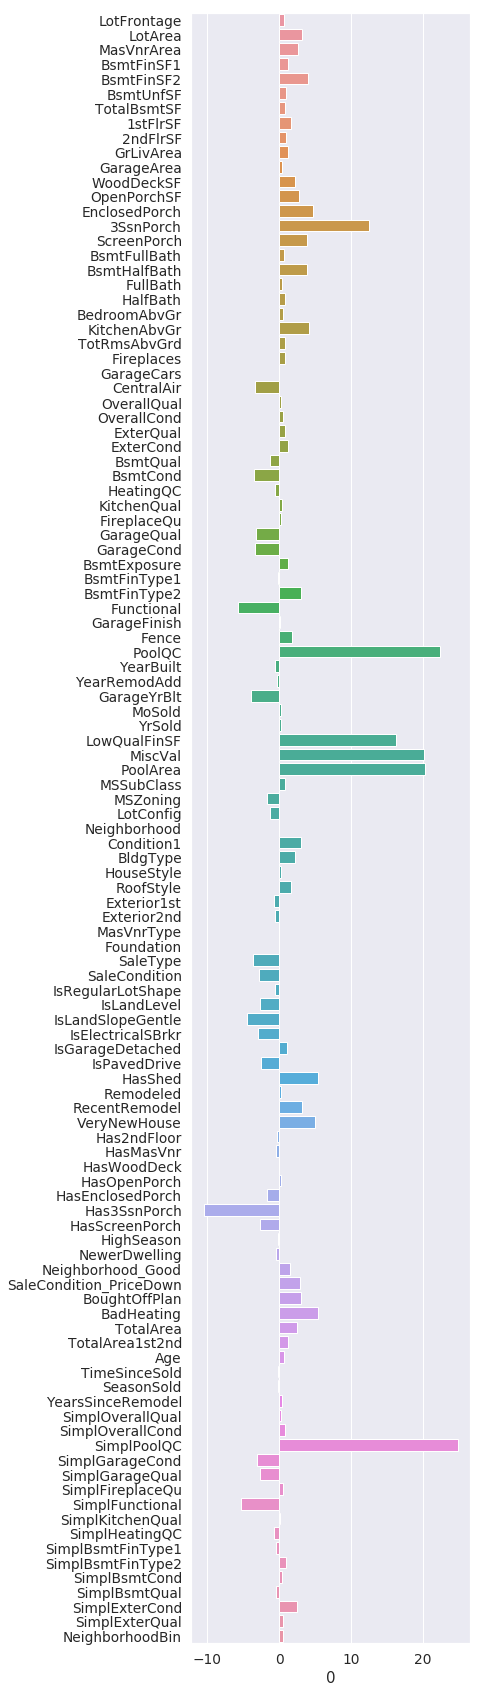

In [32]:
numeric_features = test_processed.dtypes[train_processed.dtypes != "object"].index
skewness = test_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)

plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()
# print('skew: ',test_processed[numeric_features].skew())

In [33]:
numeric_features = test_processed.dtypes[train_processed.dtypes != "object"].index

# Transform the skewed numeric features by taking log(feature + 1).
# This will make the features more normal.
from scipy.stats import skew

skewed = test_processed[numeric_features].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[(skewed < -0.75) | (skewed > 0.75)]
skewed = skewed.index

test_processed[skewed] = np.log1p(test_processed[skewed])

# Additional processing: scale the data.   
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled = scaler.fit_transform(test_processed[numeric_features])
for i, col in enumerate(numeric_features):
    test_processed[col] = scaled[:, i]

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


**Observation**
- A significant number of observations with value zero (houses without basement).
- A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we need to add 1 and then perform log transform operation.
**Note** :
For real-valued input, log1p is accurate also for x so small that 1 + x == 1 in floating-point accuracy.

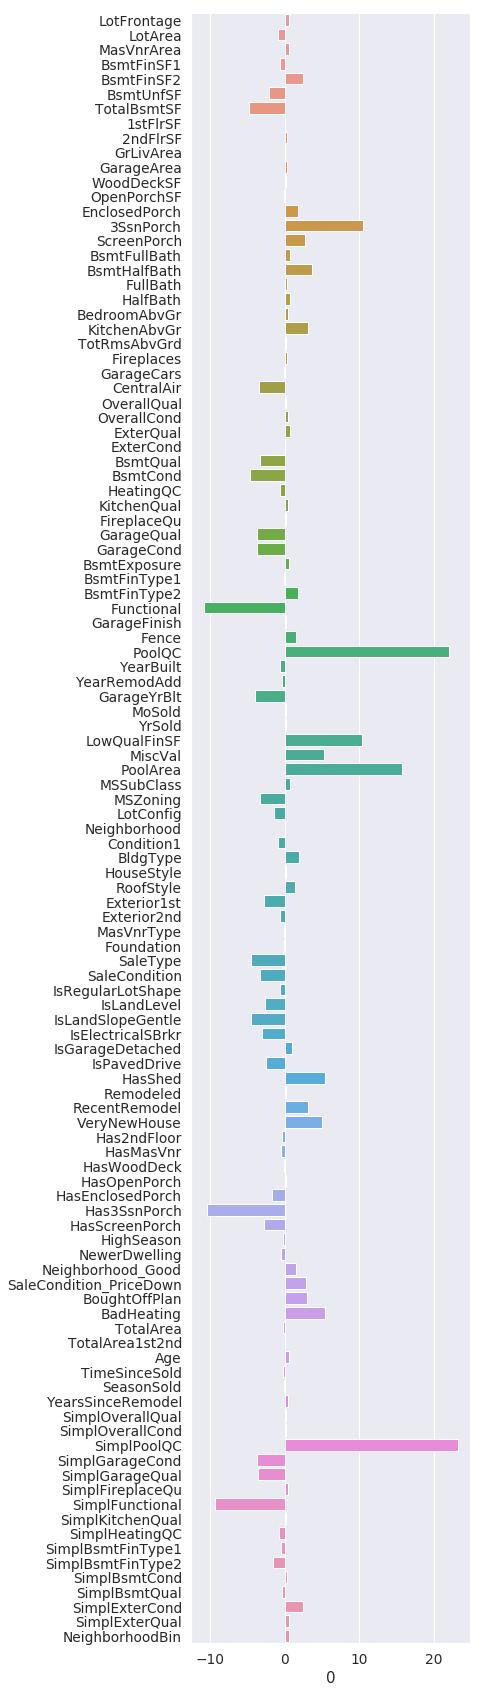

In [34]:
numeric_features = test_processed.dtypes[train_processed.dtypes != "object"].index
skewness = test_processed[numeric_features].skew(axis=0 , skipna =True)
skewness = pd.DataFrame(skewness)

plt.figure(figsize=[5,30])
# skw = sns.load_dataset(skewness)
ax = sns.barplot( y= skewness.index , x=skewness[0] , data = skewness)
plt.show()
# print('skew: ',test_processed[numeric_features].skew())

We can see that skewness of the following features decreased a lot:
- LotArea
- WoodDeskSf
- OpenPorch
- Extencond
- MiscVal
- TotalArea

But other numeric features also improved its skewness a little bit.

## Additional processing to scale the data.   

### One hot encoding
To encode categorical integer features as a one-hot numeric array we are using one hot encoding. This will transform each value of catagories into a features and make those a column value of dataframe. Finally put binary values in the rows of those column.

In [35]:
# for example:

# ╔════════════╦═════════════════╦════════╗ 
# ║ CompanyName Categoricalvalue ║ Price  ║
# ╠════════════╬═════════════════╣════════║ 
# ║ VW         ╬      1          ║ 20000  ║
# ║ Acura      ╬      2          ║ 10011  ║
# ║ Honda      ╬      3          ║ 50000  ║
# ║ Honda      ╬      3          ║ 10000  ║
# ╚════════════╩═════════════════╩════════╝

# converting it to one Hot encoding:

# ╔════╦══════╦══════╦════════╦
# ║ VW ║ Acura║ Honda║ Price  ║
# ╠════╬══════╬══════╬════════╬
# ║ 1  ╬ 0    ╬ 0    ║ 20000  ║
# ║ 0  ╬ 1    ╬ 0    ║ 10011  ║
# ║ 0  ╬ 0    ╬ 1    ║ 50000  ║
# ║ 0  ╬ 0    ╬ 1    ║ 10000  ║
# ╚════╩══════╩══════╩════════╝

# refrence: https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

In this section at first we merge train and test data (variable name predictor_cols and predictor_cols_test). We did it because there is some features in train data which is missing in test data again same thing can happen for test data too. 

In [36]:
# Convert categorical features using one-hot encoding.
def onehot(onehot_df, df, column_name, fill_na, drop_name):
    onehot_df[column_name] = df[column_name]
    if fill_na is not None:
        onehot_df[column_name].fillna(fill_na, inplace=True)

    dummies = pd.get_dummies(onehot_df[column_name], prefix="_" + column_name)

    onehot_df = onehot_df.join(dummies)
    onehot_df = onehot_df.drop([column_name], axis=1)
    return onehot_df


#### performing one hot

In [37]:

def proceed_onehot(df):
    onehot_df = pd.DataFrame(index = df.index)

    onehot_df = onehot(onehot_df, df, "MSSubClass", None, "40")
    onehot_df = onehot(onehot_df, df, "MSZoning", "RL", "RH")
    onehot_df = onehot(onehot_df, df, "LotConfig", None, "FR3")
    onehot_df = onehot(onehot_df, df, "Neighborhood", None, "OldTown")
    onehot_df = onehot(onehot_df, df, "Condition1", None, "RRNe")
    onehot_df = onehot(onehot_df, df, "BldgType", None, "2fmCon")
    onehot_df = onehot(onehot_df, df, "HouseStyle", None, "1.5Unf")
    onehot_df = onehot(onehot_df, df, "RoofStyle", None, "Shed")
    onehot_df = onehot(onehot_df, df, "Exterior1st", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Exterior2nd", "VinylSd", "CBlock")
    onehot_df = onehot(onehot_df, df, "Foundation", None, "Wood")
    onehot_df = onehot(onehot_df, df, "SaleType", "WD", "Oth")
    onehot_df = onehot(onehot_df, df, "SaleCondition", "Normal", "AdjLand")

    # Fill in missing MasVnrType for rows that do have a MasVnrArea.
    temp_df = df[["MasVnrType", "MasVnrArea"]].copy()
    idx = (df["MasVnrArea"] != 0) & ((df["MasVnrType"] == "None") | (df["MasVnrType"].isnull()))
    temp_df.loc[idx, "MasVnrType"] = "BrkFace"
    onehot_df = onehot(onehot_df, temp_df, "MasVnrType", "None", "BrkCmn")

    # Also add the booleans from calc_df as dummy variables.
    onehot_df = onehot(onehot_df, df, "LotShape", None, "IR3")
    onehot_df = onehot(onehot_df, df, "LandContour", None, "Low")
    onehot_df = onehot(onehot_df, df, "LandSlope", None, "Sev")
    onehot_df = onehot(onehot_df, df, "Electrical", "SBrkr", "FuseP")
    onehot_df = onehot(onehot_df, df, "GarageType", "None", "CarPort")
    onehot_df = onehot(onehot_df, df, "PavedDrive", None, "P")
    onehot_df = onehot(onehot_df, df, "MiscFeature", "None", "Othr")

    # Features we can probably ignore (but want to include anyway to see
    # if they make any positive difference).
    # Definitely ignoring Utilities: all records are "AllPub", except for
    # one "NoSeWa" in the train set and 2 NA in the test set.
    onehot_df = onehot(onehot_df, df, "Street", None, "Grvl")
    onehot_df = onehot(onehot_df, df, "Alley", "None", "Grvl")
    onehot_df = onehot(onehot_df, df, "Condition2", None, "PosA")
    onehot_df = onehot(onehot_df, df, "RoofMatl", None, "WdShake")
    onehot_df = onehot(onehot_df, df, "Heating", None, "Wall")

    # I have these as numerical variables too.
    onehot_df = onehot(onehot_df, df, "ExterQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "ExterCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "HeatingQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "KitchenQual", "TA", "Ex")
    onehot_df = onehot(onehot_df, df, "FireplaceQu", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageQual", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "GarageCond", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "PoolQC", "None", "Ex")
    onehot_df = onehot(onehot_df, df, "BsmtExposure", "None", "Gd")
    onehot_df = onehot(onehot_df, df, "BsmtFinType1", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "BsmtFinType2", "None", "GLQ")
    onehot_df = onehot(onehot_df, df, "Functional", "Typ", "Typ")
    onehot_df = onehot(onehot_df, df, "GarageFinish", "None", "Fin")
    onehot_df = onehot(onehot_df, df, "Fence", "None", "MnPrv")
    onehot_df = onehot(onehot_df, df, "MoSold", None, None)
    
    # Divide up the years between 1871 and 2010 in slices of 20 years.
    year_map = pd.concat(pd.Series("YearBin" + str(i+1), index=range(1871+i*20,1891+i*20)) for i in range(0, 7))

    yearbin_df = pd.DataFrame(index = df.index)
    yearbin_df["GarageYrBltBin"] = df.GarageYrBlt.map(year_map)
    yearbin_df["GarageYrBltBin"].fillna("NoGarage", inplace=True)

    yearbin_df["YearBuiltBin"] = df.YearBuilt.map(year_map)
    yearbin_df["YearRemodAddBin"] = df.YearRemodAdd.map(year_map)
    
    onehot_df = onehot(onehot_df, yearbin_df, "GarageYrBltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearBuiltBin", None, None)
    onehot_df = onehot(onehot_df, yearbin_df, "YearRemodAddBin", None, None)

    return onehot_df

# Add the one-hot encoded categorical features.
onehot_df = proceed_onehot(train)
onehot_df = onehot(onehot_df, neighborhood_bin_train, "NeighborhoodBin", None, None)
train_processed = train_processed.join(onehot_df)


These onehot columns are missing in the test data, so drop them from the training data or we might overfit on them.

In [38]:
drop_cols = [
                "_Exterior1st_ImStucc", "_Exterior1st_Stone",
                "_Exterior2nd_Other","_HouseStyle_2.5Fin", 
            
                "_RoofMatl_Membran", "_RoofMatl_Metal", "_RoofMatl_Roll",
                "_Condition2_RRAe", "_Condition2_RRAn", "_Condition2_RRNn",
                "_Heating_Floor", "_Heating_OthW",

                "_Electrical_Mix", 
                "_MiscFeature_TenC",
                "_GarageQual_Ex", "_PoolQC_Fa"
            ]
train_processed.drop(drop_cols, axis=1, inplace=True)

In [39]:
onehot_df = proceed_onehot(test)
onehot_df = onehot(onehot_df, neighborhood_bin_test, "NeighborhoodBin", None, None)
test_processed = test_processed.join(onehot_df)

This column is missing in the training data. There is only one example with this value in the test set. So just drop it.

In [40]:
test_processed.drop(["_MSSubClass_150"], axis=1, inplace=True)

Drop these columns. They are either not very helpful or they cause overfitting.

In [41]:
drop_cols = [
    "_Condition2_PosN",    # only two are not zero
    "_MSZoning_C (all)",
    "_MSSubClass_160",
]
train_processed.drop(drop_cols, axis=1, inplace=True)
test_processed.drop(drop_cols, axis=1, inplace=True)

# log transform

According to Hair et al. (2013), four assumptions should be tested:

- **Normality** - When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

- **Homoscedasticity** -  Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

- **Linearity** - The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

'SalePrice' is not normal. It shows 'peakedness', positive skewness and does not follow the diagonal line. But a simple data transformation can solve the problem.

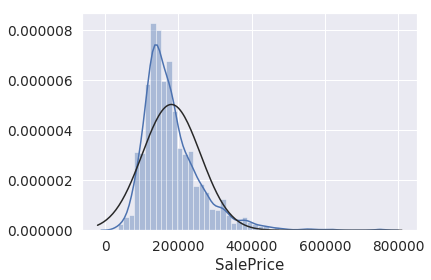

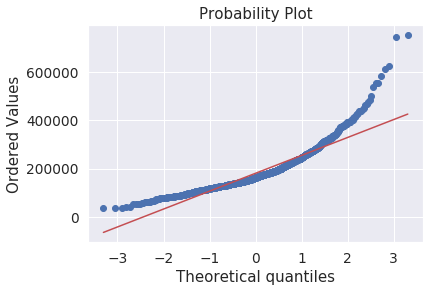

In [42]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

We take the log here because the error metric is between the log of the
SalePrice and the log of the predicted price. That does mean we need to 
exp() the prediction to get an actual sale price.

In [43]:
target = pd.DataFrame(index = train_processed.index, columns=["SalePrice"])
target["SalePrice"] = np.log(train["SalePrice"])
# train_processed.drop(["SalePrice"], axis=1, inplace=True)

print("Training set size:", train_processed.shape)
print("Test set size:", test_processed.shape)

Training set size: (1458, 403)
Test set size: (1459, 403)


Now we can see the following graph is normal and the probability plot reflects linearity.

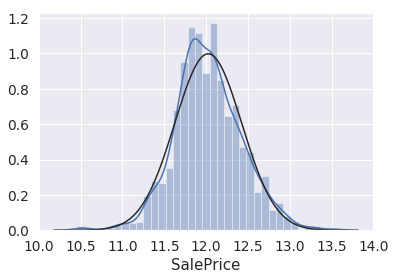

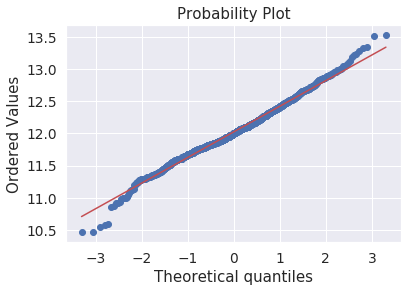

In [44]:
from scipy.stats import norm
from scipy import stats
#histogram and normal probability plot
sns.distplot(target['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(target['SalePrice'], plot=plt)

### Outlier Crosscheck

In this section we are checking again If any outlier remains after all the data processing. 

In [45]:
 # A FUNCTION THAT SHOWS SCATTER-PLOT AND DISTRIBUTION-PLOT
def outlier_check_plot(column):
    plt.subplots(figsize=(19, 5))
    # SCATTER PLOT OF THE 19 HIGHEST-VALUES OF A COLUMN
    plt.subplot(1, 3, 1)
    plt.scatter(x = train_processed[column].sort_values(ascending=False)[:19], y = train.Id[:19], color='red', label='Train' )
    plt.scatter(x = test_processed[column].sort_values(ascending=False)[:19], y = test.Id[:19], label='Test')
    plt.ylabel('Serial Number', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 1: 19 highest-values of category {} \n in both train and test dataset'.format(column))
    plt.legend(loc='center',fontsize=13)
    # DISTRIBUTION-PLOT OF THE COLUMN
    plt.subplot(1, 3, 2)
    sns.distplot(train_processed[column],color='red', rug=True, hist=False, label='Train')
    sns.distplot(test_processed[column], rug=True, hist=False, label='Test')
    plt.ylabel('Distribution', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 2: Distribution-plot of category {} \n for both train and test dataset'.format(column))
    plt.legend(fontsize=13)
    # SCATTER-PLOT OF THE COLUMN WITH RESPECT TO SALEPRICE
    plt.subplot(1, 3, 3)
    plt.scatter(x = train_processed[column], y = target)
    plt.ylabel('SalePrice', fontsize=13)
    plt.xlabel(column, fontsize=13)
    plt.title('Fig 3: Scatter-plot of train-category {} \n with respect to SalePrice'.format(column))
    plt.show()


Before outlier-removal of 1stFlrSF: 


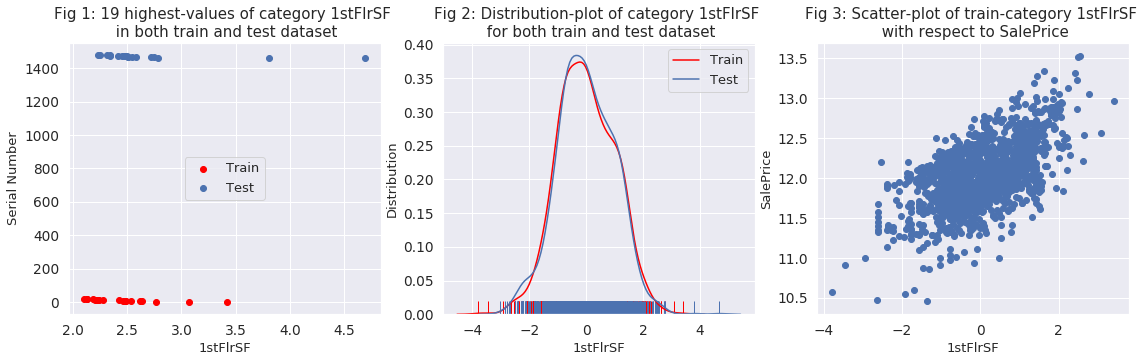

In [46]:
print('Before outlier-removal of 1stFlrSF: ')
outlier_check_plot('1stFlrSF')


Before outlier-removal of BsmtFinSF1: 


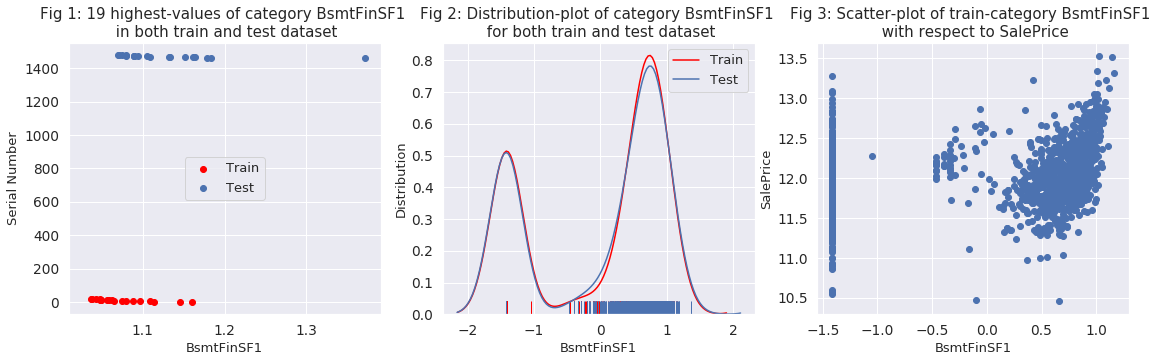

In [47]:
print('Before outlier-removal of BsmtFinSF1: ')
outlier_check_plot('BsmtFinSF1')


Before outlier-removal of LotArea: 


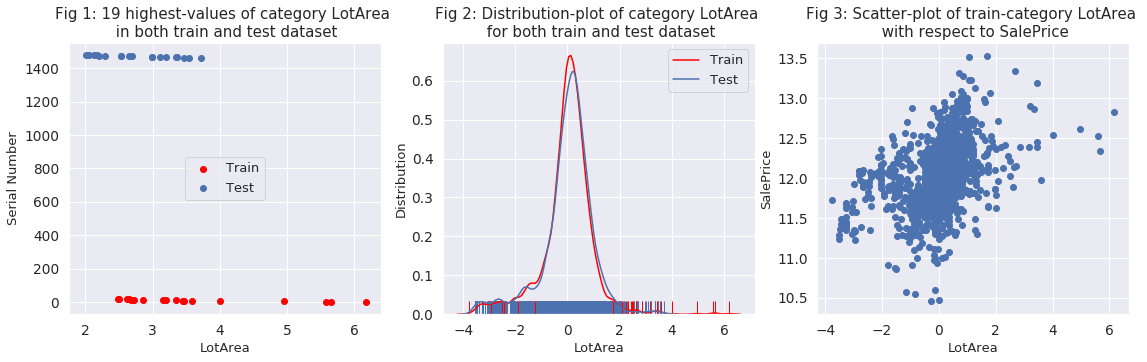

In [48]:
print('Before outlier-removal of LotArea: ')
outlier_check_plot('LotArea')


Before outlier-removal of GrLivArea: 


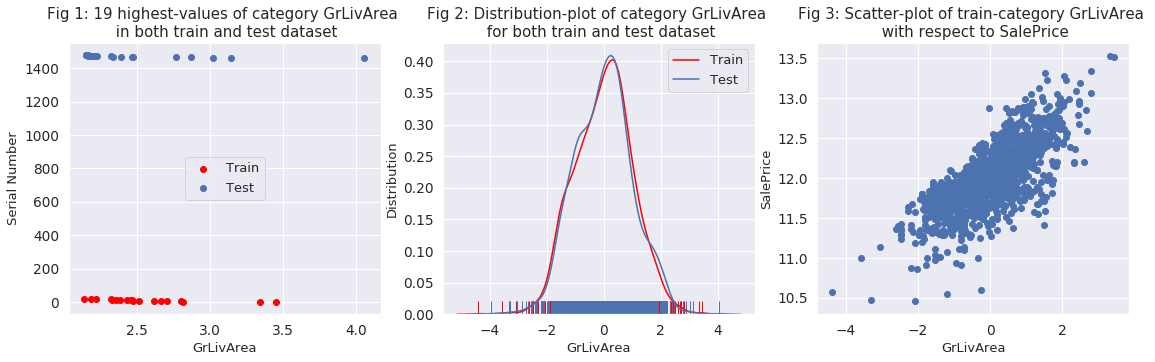

In [49]:
print('Before outlier-removal of GrLivArea: ')
outlier_check_plot('GrLivArea')


Before outlier-removal of MasVnrArea: 


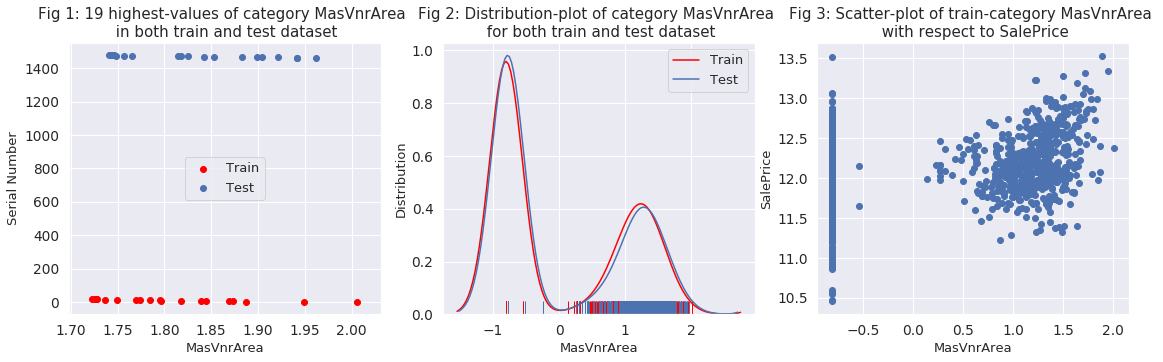

In [50]:
print('Before outlier-removal of MasVnrArea: ')
outlier_check_plot('MasVnrArea')


Before outlier-removal of LotFrontage: 


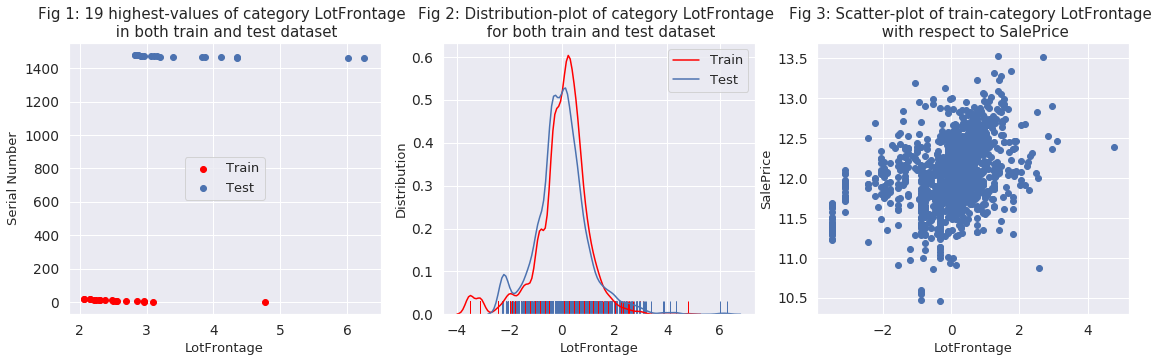

In [51]:
print('Before outlier-removal of LotFrontage: ')
outlier_check_plot('LotFrontage')


Before outlier-removal of TotalBsmtSF: 


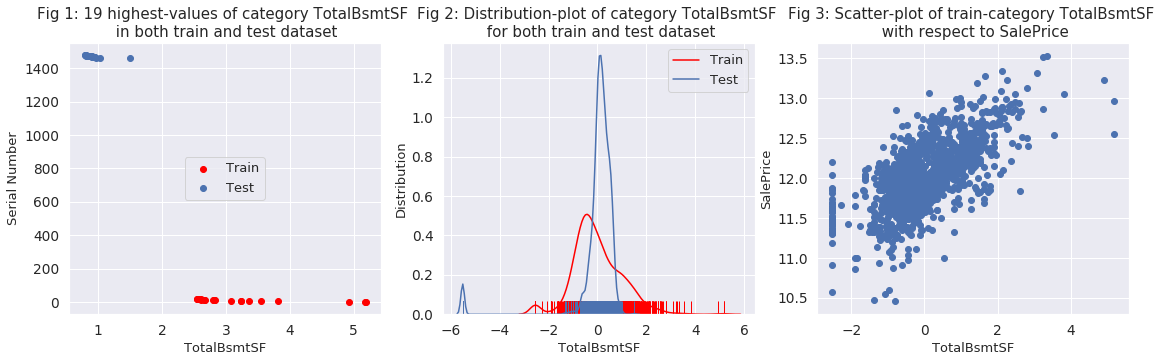

In [52]:
print('Before outlier-removal of TotalBsmtSF: ')
outlier_check_plot('TotalBsmtSF')


This time we can see that the distribution improved a little bit due to log transformation and I was expecting that few outliers we observed earlier are no longer seems to be a outlier. Only the common outlier was the actual source of the problem. So we can now proceed to feed these data to our model.

## Corelation Matrix after procesing 

In [53]:
abc = train_processed.copy()
abc['SalePrice'] = target
abc.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,CentralAir,OverallQual,OverallCond,ExterQual,ExterCond,BsmtQual,BsmtCond,HeatingQC,KitchenQual,FireplaceQu,GarageQual,GarageCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Functional,GarageFinish,Fence,PoolQC,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold,LowQualFinSF,MiscVal,PoolArea,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,Foundation,SaleType,SaleCondition,IsRegularLotShape,IsLandLevel,IsLandSlopeGentle,IsElectricalSBrkr,IsGarageDetached,IsPavedDrive,HasShed,Remodeled,RecentRemodel,VeryNewHouse,Has2ndFloor,HasMasVnr,HasWoodDeck,HasOpenPorch,HasEnclosedPorch,Has3SsnPorch,HasScreenPorch,HighSeason,NewerDwelling,Neighborhood_Good,SaleCondition_PriceDown,BoughtOffPlan,BadHeating,TotalArea,TotalArea1st2nd,Age,TimeSinceSold,SeasonSold,YearsSinceRemodel,SimplOverallQual,SimplOverallCond,SimplPoolQC,SimplGarageCond,SimplGarageQual,SimplFireplaceQu,SimplFunctional,SimplKitchenQual,SimplHeatingQC,SimplBsmtFinType1,SimplBsmtFinType2,SimplBsmtCond,SimplBsmtQual,SimplExterCond,SimplExterQual,NeighborhoodBin,_MSSubClass_20,_MSSubClass_30,_MSSubClass_40,_MSSubClass_45,_MSSubClass_50,_MSSubClass_60,_MSSubClass_70,_MSSubClass_75,_MSSubClass_80,_MSSubClass_85,_MSSubClass_90,_MSSubClass_120,_MSSubClass_180,_MSSubClass_190,_MSZoning_FV,_MSZoning_RH,_MSZoning_RL,_MSZoning_RM,_LotConfig_Corner,_LotConfig_CulDSac,_LotConfig_FR2,_LotConfig_FR3,_LotConfig_Inside,_Neighborhood_Blmngtn,_Neighborhood_Blueste,_Neighborhood_BrDale,_Neighborhood_BrkSide,_Neighborhood_ClearCr,_Neighborhood_CollgCr,_Neighborhood_Crawfor,_Neighborhood_Edwards,_Neighborhood_Gilbert,_Neighborhood_IDOTRR,_Neighborhood_MeadowV,_Neighborhood_Mitchel,_Neighborhood_NAmes,_Neighborhood_NPkVill,_Neighborhood_NWAmes,_Neighborhood_NoRidge,_Neighborhood_NridgHt,_Neighborhood_OldTown,_Neighborhood_SWISU,_Neighborhood_Sawyer,_Neighborhood_SawyerW,_Neighborhood_Somerst,_Neighborhood_StoneBr,_Neighborhood_Timber,_Neighborhood_Veenker,_Condition1_Artery,_Condition1_Feedr,_Condition1_Norm,_Condition1_PosA,_Condition1_PosN,_Condition1_RRAe,_Condition1_RRAn,_Condition1_RRNe,_Condition1_RRNn,_BldgType_1Fam,_BldgType_2fmCon,_BldgType_Duplex,_BldgType_Twnhs,_BldgType_TwnhsE,_HouseStyle_1.5Fin,_HouseStyle_1.5Unf,_HouseStyle_1Story,_HouseStyle_2.5Unf,_HouseStyle_2Story,_HouseStyle_SFoyer,_HouseStyle_SLvl,_RoofStyle_Flat,_RoofStyle_Gable,_RoofStyle_Gambrel,_RoofStyle_Hip,_RoofStyle_Mansard,_RoofStyle_Shed,_Exterior1st_AsbShng,_Exterior1st_AsphShn,_Exterior1st_BrkComm,_Exterior1st_BrkFace,_Exterior1st_CBlock,_Exterior1st_CemntBd,_Exterior1st_HdBoard,_Exterior1st_MetalSd,_Exterior1st_Plywood,_Exterior1st_Stucco,_Exterior1st_VinylSd,_Exterior1st_Wd Sdng,_Exterior1st_WdShing,_Exterior2nd_AsbShng,_Exterior2nd_AsphShn,_Exterior2nd_Brk Cmn,_Exterior2nd_BrkFace,_Exterior2nd_CBlock,_Exterior2nd_CmentBd,_Exterior2nd_HdBoard,_Exterior2nd_ImStucc,_Exterior2nd_MetalSd,_Exterior2nd_Plywood,_Exterior2nd_Stone,_Exterior2nd_Stucco,_Exterior2nd_VinylSd,_Exterior2nd_Wd Sdng,_Exterior2nd_Wd Shng,_Foundation_BrkTil,_Foundation_CBlock,_Foundation_PConc,_Foundation_Slab,_Foundation_Stone,_Foundation_Wood,_SaleType_COD,_SaleType_CWD,_SaleType_Con,_SaleType_ConLD,_SaleType_ConLI,_SaleType_ConLw,_SaleType_New,_SaleType_Oth,_SaleType_WD,_SaleCondition_Abnorml,_SaleCondition_AdjLand,_SaleCondition_Alloca,_SaleCondition_Family,_SaleCondition_Normal,_SaleCondition_Partial,_MasVnrType_BrkCmn,_MasVnrType_BrkFace,_MasVnrType_None,_MasVnrType_Stone,_LotShape_IR1,_LotShape_IR2,_LotShape_IR3,_LotShape_Reg,_LandContour_Bnk,_LandContour_HLS,_LandContour_Low,_LandContour_Lvl,_LandSlope_Gtl,_LandSlope_Mod,_LandSlope_Sev,_Electrical_FuseA,_Electrical_FuseF,_Electrical_FuseP,_Electrical_SBrkr,

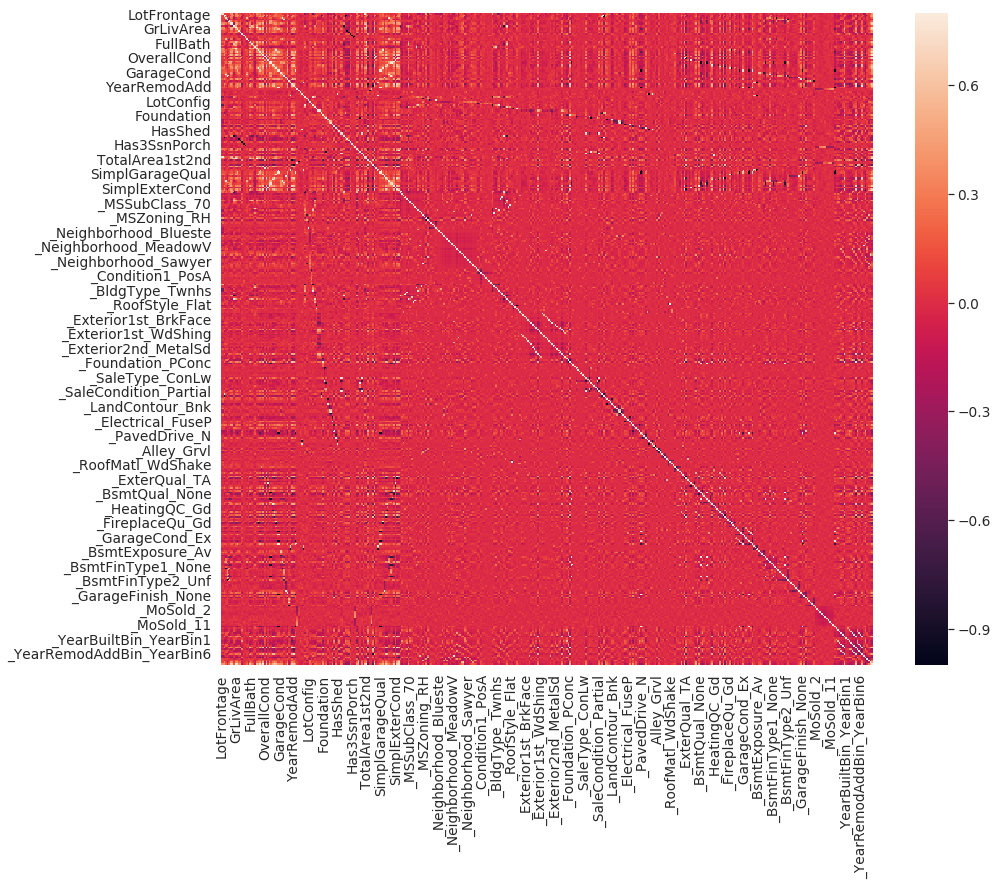

In [54]:
#correlation matrix
corrmat = abc.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
sns.heatmap(corrmat, vmax=.8, square=True);

We can see that above graph is almost completely red that means no feature have any relation with another feature. That means all the features are now independent. So our data processing part should be good enough to get good results.

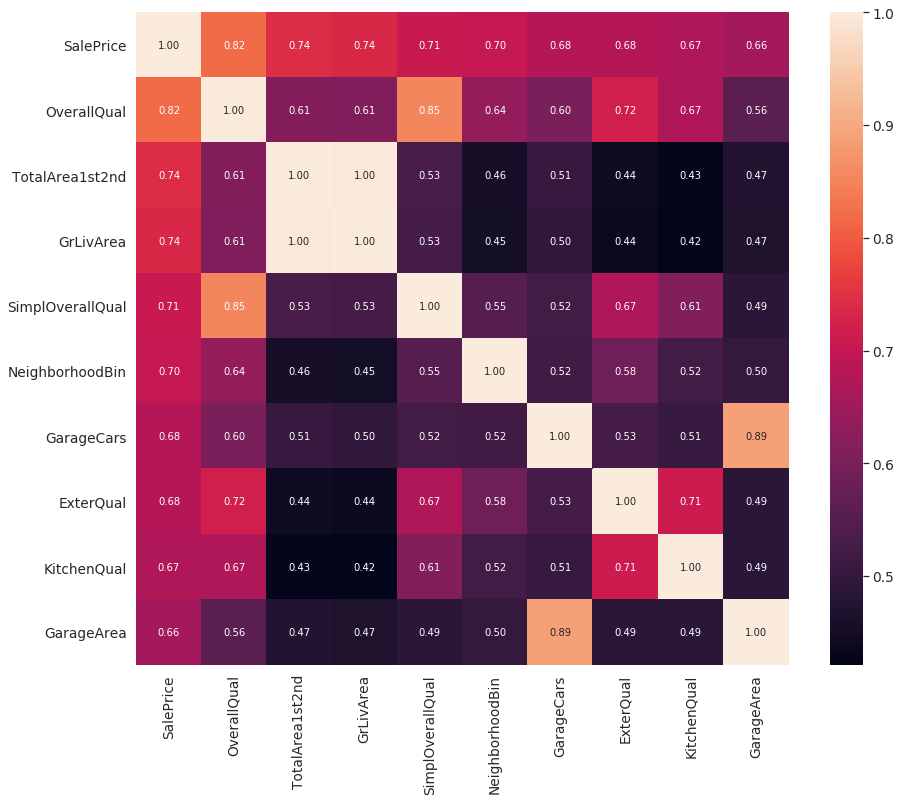

In [66]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(abc[cols].values.T)
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()



We can see that GrLivArea and TotalArea1st2nd is actually same and in the following graph we will see that the graph is also same for both of the feature. So we can remove one of them.

The following 9 features are the most important feature for determining the SalePrice and they also don't have any outlier

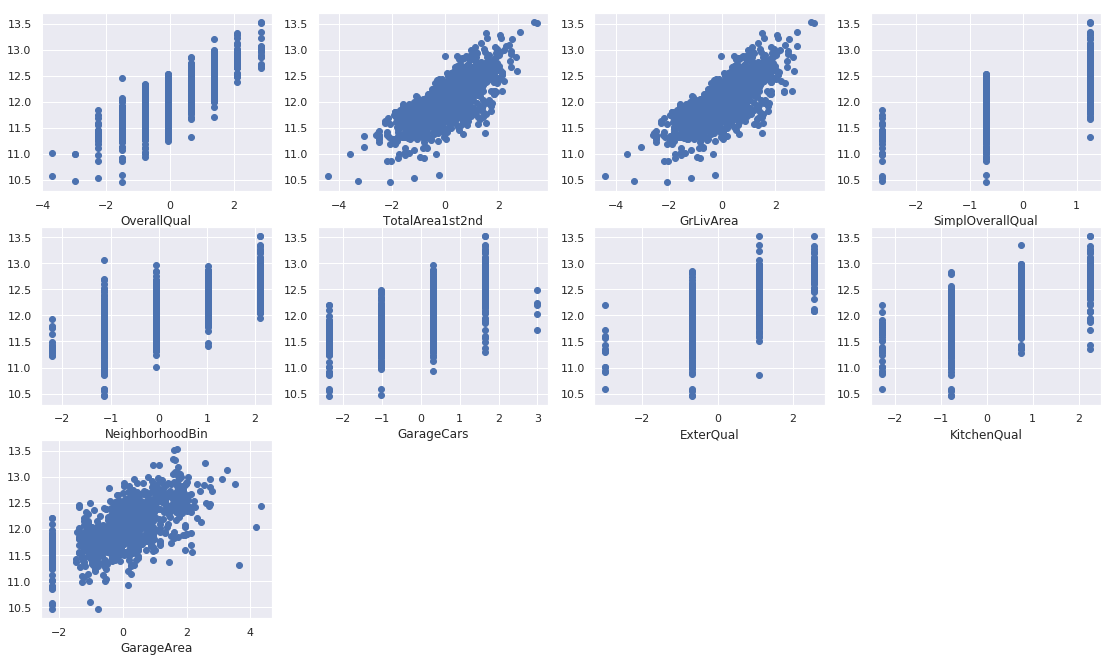

In [57]:
 # A FUNCTION TO SCATTER-PLOT ALL SELECTED FEATURES AGAINST SALEPRICE
def relation_with_SalePrice(c,column):
    plt.subplot(5, 4, c)
    plt.scatter(x = train_processed[column], y = target)
    plt.xlabel(column)
c=1
sns.set(font_scale=1)
plt.subplots(figsize=(19, 19))

if 'SalePrice' in cols:
    cols = cols.drop('SalePrice')

for item in cols:
    relation_with_SalePrice(c,item)
    c=c+1
plt.show()


Dropping GLivArea

In [58]:
if 'GrLivArea' in train_processed.columns and 'GrLivArea' in test_processed.columns:
    train_processed = train_processed.drop(columns='GrLivArea')
    test_processed = test_processed.drop(columns='GrLivArea')



set()

# Split Data for training and testing




In [76]:
X_train, X_test, y_train, y_test = train_test_split(train_processed, 
                                                    target,
#                                                     train_size = 0.99, 
                                                    test_size = 0.2, 
                                                    random_state = 95)



In [77]:
prediction_dict = dict()
submit_prediction_dict = dict()

submit = False
save_score = False

if submit :
    X_train = train_processed
    y_train = target
else:
    X_train = X_train
    y_train = y_train 

# Testing different models

### Random Forest Regressor
A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. 

In [78]:
my_model = RandomForestRegressor(n_estimators=500,n_jobs=-1)


my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)
if submit:
    submit_prediction = my_model.predict(test_processed)
    submit_prediction_dict['Random Forest Regressor'] = submit_prediction

prediction_dict['Random Forest Regressor'] = prediction

print('root mean absolute error: ',rmse(y_test, prediction))
print('accuracy score: ',  r2_score(np.array(y_test),prediction) )

/home/navid/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


root mean absolute error:  0.1353977829281994
accuracy score:  0.8648935728075346


### DecisionTree
Decision tree builds regression or classification models in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [79]:
from sklearn.tree import DecisionTreeRegressor
my_model = DecisionTreeRegressor()

my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)
prediction_dict['DecisionTree'] = prediction
if submit:
    submit_prediction = my_model.predict(test_processed)
    submit_prediction_dict['DecisionTree'] = submit_prediction

print('root mean absolute error: ',rmse(y_test, prediction))
print('accuracy score: ',  r2_score(np.array(y_test),prediction) )

root mean absolute error:  0.2056259628335605
accuracy score:  0.6883918549242529


### Xgboost 
XGBoost stands for eXtreme Gradient Boosting. It is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. 

In [80]:
from xgboost import XGBRegressor
my_model = XGBRegressor(n_estimators=500, learning_rate=0.05)

my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)
prediction_dict['Xgboost'] = prediction

if submit:
    submit_prediction = my_model.predict(test_processed)
    submit_prediction_dict['Xgboost'] = submit_prediction
    

print('root mean absolute error: ',rmse(y_test, prediction))
print('accuracy score: ',  r2_score(np.array(y_test),prediction) )

root mean absolute error:  0.12165199686861143
accuracy score:  0.8909334972517766


## Lasso
Lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the statistical model it produces.Lasso was originally formulated for least squares models and this simple case reveals a substantial amount about the behavior of the estimator, including its relationship to ridge regression and best subset selection and the connections between lasso coefficient estimates and so-called soft thresholding. It also reveals that (like standard linear regression) the coefficient estimates need not be unique if covariates are collinear.


In [81]:
from sklearn.linear_model import Lasso
my_model = Lasso(alpha=5e-3, max_iter=50000)


my_model.fit(X_train, y_train)
prediction = my_model.predict(X_test)
prediction_dict['Lasso'] = prediction

if submit:
    submit_prediction = my_model.predict(test_processed)
    submit_prediction_dict['Lasso'] = submit_prediction
    
print(' root mean absolute error: ',rmse(y_test, prediction))
print('accuracy score: ',  r2_score(np.array(y_test),prediction) )

 root mean absolute error:  0.11542444728133522
accuracy score:  0.9018142389973735


In the above model alpha is Constant that multiplies the L1 term. For numerical reason we cant set alpha to 0 but keeping alpha low provides good accuracy for out dataset. I have found 5e-4 provides good accuracy.

for 5e-5: 
 root mean absolute error:  0.10973737757187135
accuracy score:  0.9289433650407954

for 1e-5: 
 root mean absolute error:  0.11426822609093419
accuracy score:  0.9229546464396043

for 1e-3: 
root mean absolute error:  0.10466883446067998
accuracy score:  0.9353556969018821


for 1e-4: 
root mean absolute error:  0.10658498063306822
accuracy score:  0.9329671780226085

for 5e-3: 
root mean absolute error:  0.10794617678311977
accuracy score:  0.9312440935471524

# ANN

### Theory and Basics:  
An Artificial Neurol Network (ANN) is a computational model. It is based on the structure and functions of biological neural networks. It works like the way human brain processes information. ANN includes a large number of connected processing units that work together to process information. They also generate meaningful results from it.

An artificial neuron is a mathematical function conceived as a model of biological neurons, a neural network. Usually each input is separately weighted, and the sum is passed through a non-linear function known as an activation function or transfer function.

The artificial Neural network is typically organized in layers. Layers are being made up of many interconnected ‘nodes’ which contain an ‘activation function’. A neural network may contain the following 3 layers:

- <b> Input layer </b> The purpose of the input layer is to receive as input the values of the explanatory attributes for each observation. Usually, the number of input nodes in an input layer is equal to the number of explanatory variables. ‘input layer’ presents the patterns to the network, which communicates to one or more ‘hidden layers’. The nodes of the input layer are passive, meaning they do not change the data. They receive a single value on their input and duplicate the value to their many outputs. From the input layer, it duplicates each value and sent to all the hidden nodes.
- <b> Hidden Layer </b> The Hidden layers apply given transformations to the input values inside the network. In this, incoming arcs that go from other hidden nodes or from input nodes connected to each node. It connects with outgoing arcs to output nodes or to other hidden nodes. In hidden layer, the actual processing is done via a system of weighted ‘connections’. There may be one or more hidden layers. The values entering a hidden node multiplied by weights, a set of predetermined numbers stored in the program. The weighted inputs are then added to produce a single number.
- <b> Output layer </b> The hidden layers then link to an ‘output layer‘. Output layer receives connections from hidden layers or from input layer. It returns an output value that corresponds to the prediction of the response variable. In classification problems, there is usually only one output node. The active nodes of the output layer combine and change the data to produce the output values.


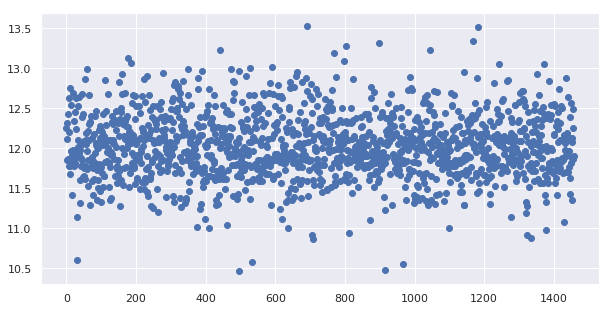

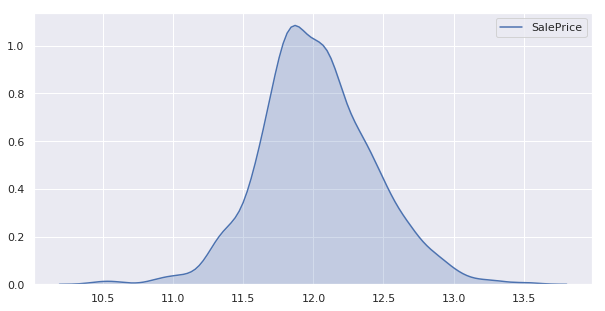

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[10,5])
plt.scatter(range(len(train)),list(target.SalePrice.values))
plt.show()
plt.figure(figsize=[10,5])
sns.kdeplot(target.SalePrice, shade= True)
plt.show()

In the above graph we can see that the price range is in a normal distribution. If we provide tf.random.normal while initializing the weight it should be more helpful for training. And this initialization should provide better validation with low amount of epoches. In my kaggle score rmse 0.123 is found through random normal while uniform distribution provided rmse 0.127 score. Again Uniform distribution takes 3 times more epoches to reach rmse score 0.127. But for uniform distribution no improvement cant found after 16000 epoch and for normal distribution no improvement can't found after 6000 epoch.

#### Target
By observing the span of the data and the data distribution we can conclude that logistic regression should perform well for this kind of problem. So we can safely say that starting with single neuron in a single hidden layer should perform well and we should look for simpler solution. Again from theoretical perspective single neurone and single layer ANN is nothing but a logistic regression and after adding layers and neurons we can regularize them so that they behave more like a logistic regression model and then we can tune parameter such a way so that it can handle little bit more complexity than a logistic regression. Finally my target is to make sure that it performs well as a logistic regression model and then improve it with more neuron/layers and proper tuning of parameters.

In [83]:
# log_df = pd.DataFrame(columns=['learning_rate', 'num_steps', 'beta1','beta2','beta3', 'hidden_1' , 'hidden_2', 'hidden_3','input_dim' , 'test_rmse_score', 'test_r2_score'])
# log_df.to_csv("diffrent_training_results.csv", index=False)

### Ann parameters 

The following ANN is build with 3 hidden layers. Output dimention is 1 because its a regration problem.

In [84]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 8000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.0
beta3 = 0.0
beta4 = None

hidden_1 = 16
hidden_2 = 8
hidden_3 = 4
hidden_4 = None



# minimum_validation_cost is to control model saving locally
minimum_validation_cost = 0.0190000

input_dim = X_train.shape[1]  # Number of features
output_dim = 1              # Because it is a regression problem
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )



Initialization of weight and bias with random values

In [85]:
weights = {
    'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
    'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),
    'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])),
    'out': tf.Variable(tf.random_normal([hidden_3, output_dim]))
}
biases = {
    'b1': tf.Variable(tf.random_normal([hidden_1])),
    'b2': tf.Variable(tf.random_normal([hidden_2])),
    'b3': tf.Variable(tf.random_normal([hidden_3])),
    'out': tf.Variable(tf.random_normal([output_dim]))
}

Instructions for updating:
Colocations handled automatically by placer.


## Model

In the dataset Sales price are non negative number so our model is expected to return positive values so as a activation function I have used relu as it gives positive values. Again relu is easy to optimize because they are similar to linear units. The only difference is that a rectified linear unit outputs zero across half its domain. Thus derivatives through a rectified linear unit remain large whenever the unit is activate. The gradients are not only large but also consistent. 

In [86]:
def ann_model(X_val):
  # Hidden layers
    layer_1 = tf.add(tf.matmul(X_val, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    
    # Output layer
    layer_out = tf.matmul(layer_3, weights['out']) + biases['out']

    return layer_out

For optimization I have used Adam optimizer. Adam derives from phrase “adaptive moments”. Its a varient of RMSProp. I have used adam instead of RMSProp for couple of reasons. First, in Adam, momentum is incorporated directly as an estimate of the ﬁrst-order moment (with exponential weighting) of the gradient. The most straightforward way to add momentum to RMSProp is to apply momentum to the rescaled gradients. The use of momentum in combination with rescaling does not have a clear theoretical motivation. Second, Adam includes bias corrections to the estimates of both the ﬁrst-order moments (the momentumterm) and the (uncentered) second-order moments to account for their initializationat the origin. RMSProp also incorporates an estimate of the (uncentered) second-order moment; however, it lacks the correction factor. Thus,unlike in Adam, the RMSProp second-order moment estimate may have high bias early in training. Adam is generally regarded as being fairly robust to the choice of hyperparameters, though the learning rate sometimes needs to be changed from the suggested default. Usually default rate is .001 but for our case I have used 0.1 as it gives better optimization results. 

In [87]:
# Model Construct
model = ann_model(X_tf)

# Mean Squared Error cost function
cost = tf.reduce_mean(tf.square(y_tf - model))
# cost = tf.reduce_mean(tf.losses.mean_squared_error(y_tf , model))

# cost = tf.square(y_tf - model)
regularizer_1 = tf.nn.l2_loss(weights['w1'])
regularizer_2 = tf.nn.l2_loss(weights['w2'])
regularizer_3 = tf.nn.l2_loss(weights['w3'])
cost = tf.reduce_mean(cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3)
# cost = cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3

# Adam optimizer will update weights and biases after each step
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


# Initialize variables 
init = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()


Instructions for updating:
Use tf.cast instead.


## Training

In [88]:
train_LC = []
val_LC = []
# session_var = None

Above train LC and val Lc variable keeps track of the learning rate so that learning curve can be drwan.

In [89]:

def training_block(X_train,y_train, X_test,y_test):
    #reseting variables
    session_var = None
    save_path = None
    loss_op = tf.losses.mean_squared_error(y_tf , model)
    with tf.Session() as sess:
        
        #running initializer
        sess.run(init)
        
#         minimum_validation_cost = 0.0190000

        global minimum_validation_cost
        for i in range(num_steps):
            if submit :
                X_train = shuffle(train_processed , random_state = i)
                y_train = shuffle(target , random_state = i)
            else:
                X_train = shuffle(X_train , random_state = i)
                y_train = shuffle(y_train , random_state = i)
                
            sess.run(optimizer, feed_dict={X_tf:X_train, y_tf:y_train})
            trn_cost = sess.run(loss_op, feed_dict={X_tf:X_train, y_tf:y_train})
            tst_cost = sess.run(loss_op, feed_dict={X_tf:X_test, y_tf:y_test}) 
            if submit :
                new_minimum_validation_cost = np.min(trn_cost)
            else:
                new_minimum_validation_cost = np.min(tst_cost)

#             if (i+1)%50 == 0:
            train_LC.append(trn_cost)
            val_LC.append(tst_cost)

            if (i+1)%500 == 0:
                print("epoch no : ",i+1, "  training cost: ",trn_cost, "  validation cost: ", tst_cost, "    minimum_validation_cost" , minimum_validation_cost)

            if new_minimum_validation_cost  < minimum_validation_cost :
                minimum_validation_cost = new_minimum_validation_cost
#                 global session_var
#                 session_var = sess
#                 Save the variables to disk.
                save_path = saver.save(sess, "model/model.ckpt")
        
        if bool(save_path):
            sess.close()
            print("Model saved in path: %s" % save_path)



training_block(X_train,y_train, X_test,y_test)

Instructions for updating:
Use tf.cast instead.
epoch no :  500   training cost:  0.095326155   validation cost:  0.17294136     minimum_validation_cost 0.019
epoch no :  1000   training cost:  0.01886405   validation cost:  0.027153902     minimum_validation_cost 0.019
epoch no :  1500   training cost:  0.008822455   validation cost:  0.014620812     minimum_validation_cost 0.014621526
epoch no :  2000   training cost:  0.008103139   validation cost:  0.013490256     minimum_validation_cost 0.013482186
epoch no :  2500   training cost:  0.009343478   validation cost:  0.014157464     minimum_validation_cost 0.013187333
epoch no :  3000   training cost:  0.007518526   validation cost:  0.013702043     minimum_validation_cost 0.013068339
epoch no :  3500   training cost:  0.0072581354   validation cost:  0.013602154     minimum_validation_cost 0.013068339
epoch no :  4000   training cost:  0.0075129997   validation cost:  0.014020549     minimum_validation_cost 0.01264013
epoch no :  45

### Grid search on epoch:
In the above block I have saved the model for the best validation score. As I mentioned earlier the epoch to reach the best validation accuracy is not fixed. Rather we can find it in 3 different range of epoch. The reason behind this is mostly because of random initializing of the weight and if we have fixed the seed value then it might change into only one single epoch range. But doing so we loose chance to improve our model further. Again if we want to ensemble different ANN model it woun't help when we use same seed and state. I have tried 1000+ parameters and combination from the start and used graph to visualize how to improve that but with grid search I might not get the exact idea why certain things provide good results or not and looking into every search result and graph is also too much so applying on the epoch seems to me more reasonable solution because the epoch for best validation result will be different in every run.

#### Trick
I have shuffled the data in every epoch and this trick improved the validation accuracy. On the other hand I did't use batch because according to my previous experience this kind of logistic regression problem works better when its given as a whole set rather than batch or mini-batch. But if its overfitting then passing the data in a batch / mini-batch would perform better as it helps to generalize more. We can say its more like a dropout effect. And I have tried to do dropout to reduce distance of training and validation accuracy but that didn't worked well.

In [90]:
def Prediction_block(X_test):
    with tf.Session() as sess:
        try:
            # Restore variables from disk.
            saver.restore(sess, "model/model.ckpt")
            print("Model restored.")
        except:
            print("------------ available checkpoint is for different model --------------")
            return 
        # Check the values of the variables
        pred =  sess.run(model, feed_dict={X_tf: X_test})
        prediction = pred.squeeze()
        sess.close()
        return prediction
    #     print(np.exp(prediction))
    
prediction = Prediction_block(X_test)

pred_str = 'ANN_base_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from model/model.ckpt
Model restored.


## Learning curve

 Following variables are only used to zoom into the graph
- start_observation_flag = starts point to zoom in
- end_observation_flag = end point to zoom in

In [67]:
def learning_curve(start_observation_flag,end_observation_flag):
    xdata = list(range(1,len(train_LC)+1))
    minimum = min(train_LC)

    plt.figure(figsize=[20,5])
    plt.plot(xdata, train_LC, 'b--')
    plt.annotate('train min', xy=(xdata[train_LC.index(minimum)], minimum),
                 arrowprops=dict(facecolor='black', shrink=0.05))

    minimum = min(val_LC)
    plt.plot(xdata, val_LC, 'r--')
    plt.annotate('vali min', xy=(xdata[val_LC.index(minimum)], minimum),
                 arrowprops=dict(facecolor='red', shrink=0.05))

    plt.show()
    
    print("If we zoom into the curve we would have seen the following")

    plt.figure(figsize=[20,5])
    plt.plot(xdata[start_observation_flag:end_observation_flag], train_LC[start_observation_flag:end_observation_flag], 'b--')
    plt.plot(xdata[start_observation_flag:end_observation_flag], val_LC[start_observation_flag:end_observation_flag],'r--')
    plt.show()

#Following variables are only used to zoom into the graph
start_observation_flag = 1500
end_observation_flag = None
learning_curve(start_observation_flag,end_observation_flag)

NameError: name 'train_LC' is not defined

## Acuracy Score

In [93]:
def accuracy(y_test,prediction):
    test_rmse_score = rmse(y_test, prediction)
    test_r2_score =  r2_score(np.array(y_test),prediction)
    return test_rmse_score, test_r2_score

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )

ann root mean absolute error:  0.11062434059441766
accuracy score:  0.9098108501087572


### kaggle rmse: 
In kaggle ranking the above ANN model provides the best rmse score and the score is 0.12324

## Description on Learning curve and Accuracy:

We can observe where overfitting occurs. Overfitting actually occurs if the training
loss goes under the validation loss even though the validation is still dropping. It is
the sign that network is learning the patterns in the train set that are not applicable in
the validation done. In a short note we can say::
 <p> Overfitting : training loss << validation loss </p>
 <p> Underfitting : training loss >> validation loss</p>
 <p> Just right : training loss ~ validation loss </p>
 
According to this theory our both learning curve is exactly top of one another so in our case validation cost and training cost is almost same so we can say that our model is doing just the right thing. Again In validation score .1054 is impressive compared to other models.

## Save score

In [ ]:
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

## Parameters 

Following segment is actually initializing different parameters. From the dataset we can see that the estimation of sale price is a regression problem and neural network used here was overfitting most of the time due to higher variance. So for making it simpler I have penalized weight matrix of hidden layers with l2 regularization. Again I have found that single hidden layer with single neuron performs well and that means the prediction model don't need to be too complex. Thus I became ensured that regularization is going to improve performance.

# Cross validation

When we perform a random train-test split of our data, we assume that our examples are independent. That means that by knowing/seeing some instance will not help us understand other instances. However, that’s not always the case. So to make sure if the Data is actually independent, to get more metrics and to use fine tuning my parameters on whole dataset I am performing cross validation.

In [77]:


from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedKFold
kf = KFold(n_splits=10, shuffle=True)

kf_rmse_list = []
kf_r2_list = []

# train_processed['SalePrice'] = target.values
for train_index, test_index in kf.split(train_processed):
    X_train, X_test = train_processed.iloc[train_index] , train_processed.iloc[test_index]
    y_train, y_test = target.iloc[train_index], target.iloc[test_index]
    
    training_block(X_train,y_train, X_test,y_test)
    prediction = Prediction_block(X_test)
    test_rmse_score, test_r2_score = accuracy(y_test, prediction)
    
    kf_rmse_list.append(test_rmse_score)
    kf_r2_list.append(test_r2_score)
    
    print("r2 list print", kf_r2_list)
    print('rmse list print',kf_rmse_list)

print("r2 mean print", np.mean(kf_r2_list))
print('rmse mean print', np.mean(kf_rmse_list))

epoch no :  500   training cost:  0.0060526407   validation cost:  0.013463812     minimum_validation_cost 1.5039705e-05
epoch no :  1000   training cost:  0.34091434   validation cost:  0.35070515     minimum_validation_cost 1.5039705e-05
epoch no :  1500   training cost:  0.0010275361   validation cost:  0.0011846735     minimum_validation_cost 1.5039705e-05
epoch no :  2000   training cost:  0.00018706542   validation cost:  0.00019961745     minimum_validation_cost 1.5039705e-05
epoch no :  2500   training cost:  0.00031353082   validation cost:  0.0003094746     minimum_validation_cost 1.5039705e-05
epoch no :  3000   training cost:  0.00061063224   validation cost:  0.00069172616     minimum_validation_cost 1.5039705e-05
epoch no :  3500   training cost:  0.00026915237   validation cost:  0.0003274819     minimum_validation_cost 1.5039705e-05
epoch no :  4000   training cost:  0.0018195546   validation cost:  0.0018606056     minimum_validation_cost 1.5039705e-05
epoch no :  4500

KeyboardInterrupt: 

### Observation
In the cross validation section we can see that 10 fold cross validation on our best ANN model provides similar rmse to 80-20 split rmse score. So we can relay on 80-20 split on this dataset. Thus we can say that the data in the dataset is independent.

# Observing Few Other well performed ANN models

In this section We are observing the few other models and their learning curve. After that some of them will be used for Ensemble learning section for further improvement. In this model I have only changed the size of hidden layer, amount of neuron in each hidden layers , number of steps and learning rates. Rest of the part is same as the ANN described above. 

## ANN with 4 layers

### Initialization of models

In [78]:
tf.reset_default_graph()
def weight_bais():
    global weights, biases
    weights = None
    biases = None
    
    weights = {
        'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
        'w2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),
        'w3': tf.Variable(tf.random_normal([hidden_2, hidden_3])),
        'w4': tf.Variable(tf.random_normal([hidden_3, hidden_4])),
        'out': tf.Variable(tf.random_normal([hidden_4, output_dim]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden_1])),
        'b2': tf.Variable(tf.random_normal([hidden_2])),
        'b3': tf.Variable(tf.random_normal([hidden_3])),
        'b4': tf.Variable(tf.random_normal([hidden_4])),
        'out': tf.Variable(tf.random_normal([output_dim]))
    }

In [79]:
def ann_model(X_val):
  # Hidden layers
    layer_1 = tf.add(tf.matmul(X_val, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)

    layer_3 = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3'])
    layer_3 = tf.nn.relu(layer_3)
    
    layer_4 = tf.add(tf.matmul(layer_3, weights['w4']), biases['b4'])
    layer_4 = tf.nn.relu(layer_4)
    
    # Output layer
#     layer_out = tf.add(tf.matmul(layer_4, weights['out']), biases['out'])
    layer_out = tf.matmul(layer_4, weights['out']) + biases['out']

    return layer_out

In [80]:
regularizer_4 = None
def miscellaneous_initialization():
    global model, cost , regularizer_1 , regularizer_2 ,regularizer_3, regularizer_4, optimizer , init , saver
    # Model Construct
    model = ann_model(X_tf)

    # Mean Squared Error cost function
    cost = tf.reduce_mean(tf.square(y_tf - model))

    # cost = tf.square(y_tf - model)
    regularizer_1 = tf.nn.l2_loss(weights['w1'])
    regularizer_2 = tf.nn.l2_loss(weights['w2'])
    regularizer_3 = tf.nn.l2_loss(weights['w3'])
    regularizer_4 = tf.nn.l2_loss(weights['w4'])
    # cost = tf.reduce_mean(cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3)
    cost = tf.reduce_mean(cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3 + beta4*regularizer_4)

    # Adam optimizer will update weights and biases after each step
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


    # Initialize variables 
    init = tf.global_variables_initializer()

    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()


### Training 


#### ANN 1

In this section changed variables are

- learning rate = .01


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 76 Neuron | .1
|2nd hidden layer | 48 Neuron | .05
|3rd hidden layer | 32 Neuron | 0
|4th hidden layer | 16 Neuron | 0

In [83]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 25000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.05
beta3 = 0.00
beta4 = 0.0

hidden_1 = 76
hidden_2 = 48
hidden_3 = 32
hidden_4 = 16

minimum_validation_cost = .02101000

input_dim = X_train.shape[1]  # Number of features
output_dim = 1              # Because it is a regression problem

#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []


In [84]:
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)
test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )


pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training cost:  133.36346   validation cost:  134.48291     minimum_validation_cost 0.02101
epoch no :  1000   training cost:  98.64322   validation cost:  99.60521     minimum_validation_cost 0.02101
epoch no :  1500   training cost:  62.8253   validation cost:  63.59184     minimum_validation_cost 0.02101
epoch no :  2000   training cost:  33.683556   validation cost:  34.24311     minimum_validation_cost 0.02101
epoch no :  2500   training cost:  14.672807   validation cost:  15.039571     minimum_validation_cost 0.02101
epoch no :  3000   training cost:  4.9803762   validation cost:  5.1900163     minimum_validation_cost 0.02101
epoch no :  3500   training cost:  1.3037022   validation cost:  1.4037144     minimum_validation_cost 0.02101
epoch no :  4000   training cost:  0.33640513   validation cost:  0.3731887     minimum_validation_cost 0.02101
epoch no :  4500   training cost:  0.1756914   validation cost:  0.18375571     minimum_validation_cost 0.02101
epoch 

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

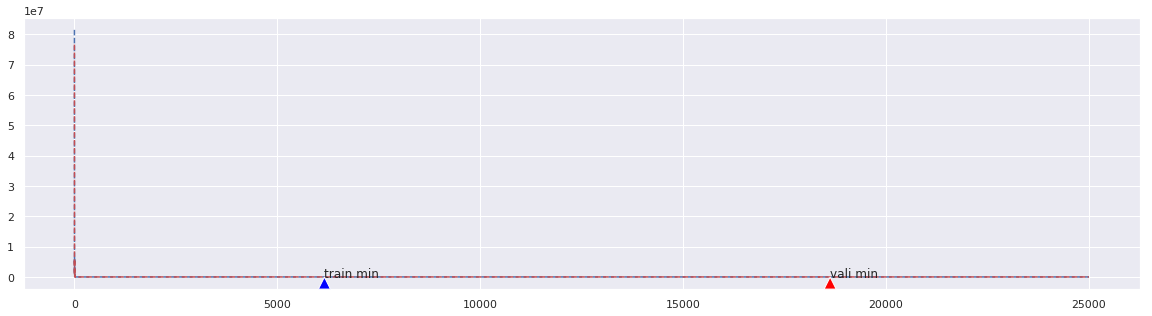

If we zoom into the curve we would have seen the following


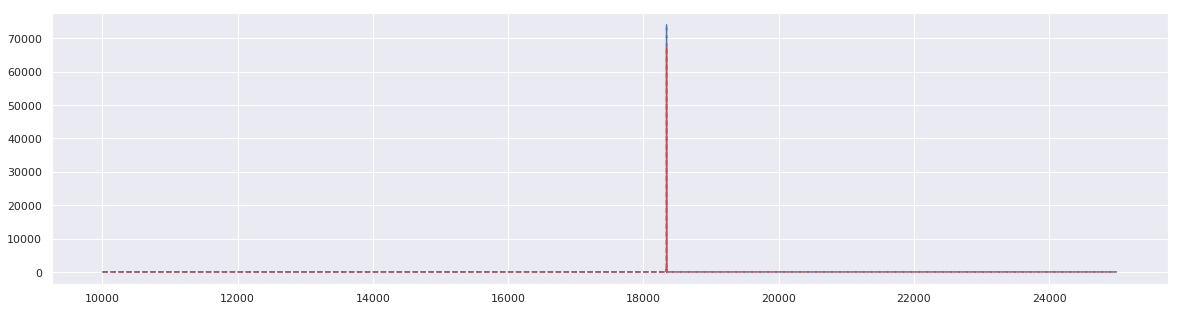

In [85]:
#Following variables are only used to zoom into the graph
start_observation_flag = 10000
end_observation_flag = None
learning_curve(start_observation_flag,end_observation_flag)

#### ANN 2
In this section changed variables are

- learning rate = .05


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 8 Neuron | .005
|2nd hidden layer | 32 Neuron | .1
|3rd hidden layer | 16 Neuron | 0.05
|4th hidden layer | 8 Neuron | 0

In [86]:
tf.reset_default_graph()
learning_rate = 0.05
num_steps = 25000
#for regularize weight matrix
beta1 = 0.005
beta2 = 0.1
beta3 = 0.05
beta4 = 0.0

hidden_1 = 8
hidden_2 = 32
hidden_3 = 16
hidden_4 = 8


minimum_validation_cost = 0.02101000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []


In [ ]:
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
# learning_curve(start_observation_flag,end_observation_flag)



pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training cost:  2.7629569   validation cost:  4.5290985     minimum_validation_cost 0.02101
epoch no :  1000   training cost:  1.2249554   validation cost:  1.7861433     minimum_validation_cost 0.02101
epoch no :  1500   training cost:  0.59469587   validation cost:  0.95542216     minimum_validation_cost 0.02101
epoch no :  2000   training cost:  0.3580041   validation cost:  0.66378134     minimum_validation_cost 0.02101
epoch no :  2500   training cost:  1.9643651   validation cost:  2.4393694     minimum_validation_cost 0.02101
epoch no :  3000   training cost:  0.20693327   validation cost:  0.4698616     minimum_validation_cost 0.02101
epoch no :  3500   training cost:  0.21899247   validation cost:  0.40384638     minimum_validation_cost 0.02101
epoch no :  4000   training cost:  0.17531388   validation cost:  0.30522242     minimum_validation_cost 0.02101
epoch no :  4500   training cost:  0.34723327   validation cost:  0.41319713     minimum_validation_cost 

In [ ]:
#Following variables are only used to zoom into the graph
start_observation_flag = 5500
end_observation_flag = 10000
learning_curve(start_observation_flag,end_observation_flag)

#### ANN 3
- learning rate = .05


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 16 Neuron | .1
|2nd hidden layer | 8 Neuron | .0
|3rd hidden layer | 4 Neuron | 0.0
|4th hidden layer | 2 Neuron | 0

In [ ]:
tf.reset_default_graph()
learning_rate = 0.05
num_steps = 15000
#for regularize weight matrix
beta1 = 0.1
beta2 = 0.0
beta3 = 0.00
beta4 = 0.0

hidden_1 = 16
hidden_2 = 8
hidden_3 = 4
hidden_4 = 2

minimum_validation_cost = 0.01901000

#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )


weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []

In [ ]:
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)
test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
# learning_curve(start_observation_flag,end_observation_flag)

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

In [ ]:
#Following variables are only used to zoom into the graph
start_observation_flag = 10000
end_observation_flag = 12000
learning_curve(start_observation_flag,end_observation_flag)

### Description on Learning curve and Accuracy:

We can observe where overfitting occurs. Overfitting actually occurs if the training
loss goes under the validation loss even though the validation is still dropping. It is
the sign that network is learning the patterns in the train set that are not applicable in
the validation done. In a short note we can say::
 <p> Overfitting : training loss << validation loss </p>
 <p> Underfitting : training loss >> validation loss</p>
 <p> Just right : training loss ~ validation loss </p>
 
According to this theory, for ANN 1,2 and 3 our both learning curve (validation cost and training cost) is exactly top of one another so in our case validation cost and training cost is almost same so we can say that our model is doing just the right thing. Again In validation score .11,.1081 and .1050 is impressive compared to other models.

## ANN single hidden layer

In [208]:
tf.reset_default_graph()
def weight_bais():
    global weights, biases
    weights = {
        'w1': tf.Variable(tf.random_normal([input_dim, hidden_1])),
        'out': tf.Variable(tf.random_normal([hidden_1, output_dim]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([hidden_1])),
        'out': tf.Variable(tf.random_normal([output_dim]))
    }

In [209]:
def ann_model(X_val):
  # Hidden layers
    layer_1 = tf.add(tf.matmul(X_val, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)

    # Output layer
    layer_out = tf.matmul(layer_1, weights['out'])+ biases['out']

    return layer_out

In [210]:
def miscellaneous_initialization():
    global model, cost , regularizer_1 , regularizer_2 ,regularizer_3, regularizer_4, optimizer , init , saver
    # Model Construct
    model = ann_model(X_tf)

    # Mean Squared Error cost function
    cost = tf.reduce_mean(tf.square(y_tf - model))

    # cost = tf.square(y_tf - model)
    regularizer_1 = tf.nn.l2_loss(weights['w1'])

    # cost = tf.reduce_mean(cost + beta1*regularizer_1 + beta2*regularizer_2 + beta3*regularizer_3)
    cost = tf.reduce_mean(cost + beta1*regularizer_1 )

    # Adam optimizer will update weights and biases after each step
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)


    # Initialize variables 
    init = tf.global_variables_initializer()

    # Add ops to save and restore all the variables.
    saver = tf.train.Saver()


#### ANN 4
- learning rate = .1


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 16 Neuron | .1

In [215]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 15000
#for regularize weight matrix
beta1 = 0.1
beta2 = None
beta3 = None
beta4 = None
minimum_validation_cost = 0.01901000
hidden_1 = 16
hidden_2 = None
hidden_3 = None
hidden_4 = None

#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )

weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
# learning_curve(start_observation_flag,end_observation_flag)


pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training cost:  0.021842035   validation cost:  0.0359185     minimum_validation_cost 0.01901
epoch no :  1000   training cost:  0.016744932   validation cost:  0.026564706     minimum_validation_cost 0.01901
epoch no :  1500   training cost:  0.014352959   validation cost:  0.026342057     minimum_validation_cost 0.018571131
epoch no :  2000   training cost:  0.009011324   validation cost:  0.017222881     minimum_validation_cost 0.014132814
epoch no :  2500   training cost:  0.014653777   validation cost:  0.020441735     minimum_validation_cost 0.014132814
epoch no :  3000   training cost:  0.041425273   validation cost:  0.052837938     minimum_validation_cost 0.014132814
epoch no :  3500   training cost:  0.008674905   validation cost:  0.015885621     minimum_validation_cost 0.014132814
epoch no :  4000   training cost:  0.009004082   validation cost:  0.014598903     minimum_validation_cost 0.014132814
epoch no :  4500   training cost:  0.0089824945   validatio

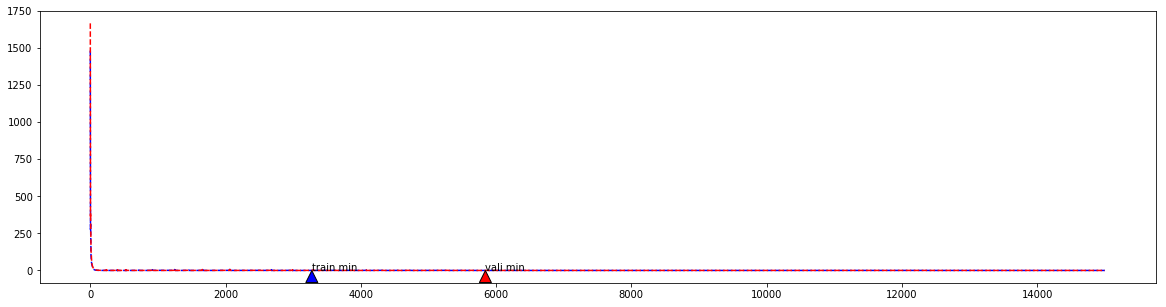

If we zoom into the curve we would have seen the following


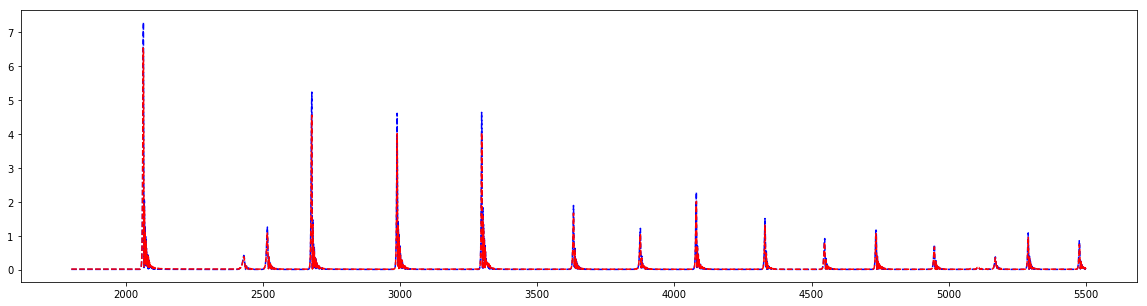

In [218]:
#Following variables are only used to zoom into the graph
start_observation_flag = 1800
end_observation_flag = 5500
learning_curve(start_observation_flag,end_observation_flag)

#### ANN 5
- learning rate = .1


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 4 Neuron | .1

In [219]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 8000
#for regularize weight matrix
beta1 = 0
beta2 = None
beta3 = None
beta4 = None

hidden_1 = 4
hidden_2 = None
hidden_3 = None
hidden_4 = None
minimum_validation_cost = 0.1701000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )


weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []

In [ ]:
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
# learning_curve(start_observation_flag,end_observation_flag)

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

epoch no :  500   training cost:  0.023957165   validation cost:  0.072689086     minimum_validation_cost 0.0728984
epoch no :  1000   training cost:  0.010170096   validation cost:  0.039603014     minimum_validation_cost 0.0396318
epoch no :  1500   training cost:  0.008217757   validation cost:  0.036400404     minimum_validation_cost 0.036412053
epoch no :  2000   training cost:  0.007394308   validation cost:  0.03661933     minimum_validation_cost 0.035021875
epoch no :  2500   training cost:  0.0069368887   validation cost:  0.037113674     minimum_validation_cost 0.035021875
epoch no :  3000   training cost:  0.0065851016   validation cost:  0.032743786     minimum_validation_cost 0.03274435
epoch no :  3500   training cost:  0.006317542   validation cost:  0.027248994     minimum_validation_cost 0.027254447
epoch no :  4000   training cost:  0.11858152   validation cost:  0.13458064     minimum_validation_cost 0.022713972
epoch no :  4500   training cost:  0.024181183   valida

In [ ]:
#Following variables are only used to zoom into the graph
start_observation_flag = 2900
end_observation_flag = 3900
learning_curve(start_observation_flag,end_observation_flag)

#### ANN 6
- learning rate = .1


| layer name | Neuron | value of beta for l2 regularization |
| ---------- | ------ | ----------------------------------- |
|1st hidden layer | 2 Neuron | .1

In [ ]:
tf.reset_default_graph()
learning_rate = 0.1
num_steps = 15000
#for regularize weight matrix
beta1 = 0
beta2 = None
beta3 = None
beta4 = None

hidden_1 = 2
hidden_2 = None
hidden_3 = None
hidden_4 = None
minimum_validation_cost = 0.01901000
#tf graph input
X_tf = tf.placeholder("float" )
y_tf = tf.placeholder("float" )


weight_bais()
miscellaneous_initialization()
train_LC = []
val_LC = []

In [ ]:
training_block(X_train,y_train, X_test,y_test)
prediction = Prediction_block(X_test)

test_rmse_score, test_r2_score = accuracy(y_test,prediction)

print('ann root mean absolute error: ', test_rmse_score)
print('accuracy score: ', test_r2_score  )
learning_curve(start_observation_flag,end_observation_flag)

pred_str = 'ANN_lr'+str(learning_rate)+'_beta'+str(beta1)+'-'+str(beta2)+'-'+str(beta3)+'-'+str(beta4)+'_hidden'+str(hidden_1)+'-'+str(hidden_2)+'-'+str(hidden_3)+'-'+str(hidden_4)
prediction_dict[pred_str] = prediction

if submit:
    submit_prediction = Prediction_block(test_processed)
    submit_prediction_dict[pred_str] = submit_prediction
# Data Save 
if save_score:
    log_df = pd.read_csv("diffrent_training_results.csv")
    log_df = log_df.append({'learning_rate' : learning_rate, 'num_steps' : num_steps, 'beta1' : beta1, 'beta2' : beta2, 'beta3' : beta3, 'beta4' : beta4, 'hidden_1' : hidden_1 , 'hidden_2' : hidden_2, 'hidden_3' : hidden_3, 'hidden_4' : hidden_4, 'input_dim' : input_dim , 'test_rmse_score' : test_rmse_score , 'test_r2_score' : test_r2_score}, ignore_index=True)
    log_df.to_csv("diffrent_training_results.csv", encoding='utf-8',index=False)

In [ ]:
#Following variables are only used to zoom into the graph
start_observation_flag = 2900
end_observation_flag = 3900
learning_curve(start_observation_flag,end_observation_flag)

### Description on Learning curve and Accuracy:

We can observe where overfitting occurs. Overfitting actually occurs if the training
loss goes under the validation loss even though the validation is still dropping. It is
the sign that network is learning the patterns in the train set that are not applicable in
the validation done. In a short note we can say::
 <p> Overfitting : training loss << validation loss </p>
 <p> Underfitting : training loss >> validation loss</p>
 <p> Just right : training loss ~ validation loss </p>
 
According to this theory, for ANN 4 our both learning curve (validation cost and training cost) is exactly top of one another so in our case validation cost and training cost is almost same so we can say that our model is doing just the right thing. Again In validation score .1059  is impressive compared to other models.

But for ANN 5 and 6  training loss << validation loss so we can say that this two model overfit data due to lower amount of neuron but ANN 4 have just the right amount of neuron thats why with similar parameter this overfit occered.

### Hyperparameeter tuning
Few of my hyperparameeter tuning is shown in the following block. In this data if a hidden layer value is 0 then it means that the hidden layer is turned off. For example if hidden_3 = 0 then that means hidden layer 3 is removed from the model and the model have only 2 hidden layer. And all the score is done on a validation set which is not seen by the model while training. For most of the case it was a 80-20 split. In the following results I didint kept any cross validation results but I have used diffrent seed while splitting data due to diffrent seed sometimes good hyperparameeter also provided so so accuracy. 

In [ ]:
log_df = pd.read_csv("diffrent_training_results.csv")
# print(log_df.to_string())
pd.set_option('display.max_rows', None)
log_df

### Observation and discovery :


- In the above parameter we can see that index 44 shows that for .001 learning parameter the model does not predict anything so I have changed it slowly and finally What I have found that learning parameter .1 and .05 provides the best results. 

- Beta1, Beta2, Beta3, Beta4 represents the regularization parameter for hidden layer 1 ,2 ,3 and 4. Sometimes in the above table we can see that hidden layer 2,3,4 is 0 or NaN but there is some value for beta 2,3,4 that means the layer is actually off so those values actually means nothing. 

- For 3 layer model when beta1, beta2, beta3  is .005, model shows significant amount of improvement while learning rate is .1 or .05 . But when learning rate is .1 and beta1=.1 , beta2=0, beta3=0 then the model performs even better most of the time and it also takes less epochs to train for the best validation accuracy

- From index 63 to 69 I have tried to use 200 , 100 , 30 neurons because the data have 403 features and its a common practice to use half amount of the neuron in the first hidden layer and this strategy does not work good enough but with my selected parameter it improved a little bit. I have used 16-8-4 combination of neuron because of this common practice. for our case 16 neuron in the first layer provided better accuracy and adding 8 and 4 in the next 2 layer improved the stability of the model and now it gives good validation accuracy after 2000 epoch and the best validation accuracy remains between the epoch range of 2000-2500 , 3300-3600 or 5000-5400 .

- From index 70 to 78 we can see that single neuron with single hidden layer performs well according to the plan stated in the target section. Then I have increased neurons and the learning curve for them is in the following block. Where y axis shows rmse and x axis shows i and i*50 represents the epoch no. Again blue curve is for training accuracy and green for validation accuracy

- In the table index 169 and 155 the model is exactly same with same parameter but one of them is providing .123 and other is providing .41 and that shows how inconsistent model become when we increase the neuron of the first hidden layer. 

- We can see that even after adding another layer ANN does not perform well when we are increasing neurons in the first layer. The reason behind it is that this type of regression problem usually do well with logistic regression. By increasing neurons we cant do much improvement and all we need to do is properly regularize small amount of neurons so that they can perform well.

#### For single neuron learning rate

<img src="img/1">

#### For 4 neuron learning curve

<img src="img/4">

#### For 16 neuron learning curve

<img src="img/16">
<br>

#### For 32 neuron learning curve

<img src="img/32">


- From the above graph we can say that for single neuron learning curve is not very stable but when neuron increases upto 32 that curve become smoother. But when submitted to kaggle 16 neuron performs better than 32 and 4 so choosing it over others is helpful. 

<br>
<br>

# Ensemble
I am using bagging method for this section. Usually in this technique we add different models results and average them. But instead of averaging I am taking different fraction from different models result. Finally making sure that it sums up to 1. 

I have tried different combinations of ensemble learning to improve performance. Kaggle has a certain limitation on uploading submission files. So what I have tried is that before submitting it to kaggle, I have made 80-20 split. I made prediction on the 20% data. Then I have tried ensemble learning so that before submission I can confirm which combination might work well.

In [ ]:
if submit :
    pred_df = pd.read_csv("diffrent_pred_results.csv")
else:
    pred_df = pd.read_csv("pred_results.csv")
    
    
if not submit:
    pd.set_option('display.max_colwidth', -1)
    pred_df = pd.DataFrame(prediction_dict)
    pred_df.to_csv("pred_results.csv", encoding='utf-8',index=False)

else:
    pd.set_option('display.max_colwidth', -1)
    pred_df = pd.DataFrame(submit_prediction_dict)
    pred_df.to_csv("diffrent_pred_results.csv", encoding='utf-8',index=False)

pd.DataFrame(pred_df.columns)

### Naming explanation of above table



| Name | learning rate |beta1 | beta 2 | beta 3 | beta 4 | hidden layer 1 | hidden layer 2 | hidden layer 3 | hidden layer 4 |
|------|---------------|------|--------|--------|--------|----------------|----------------|---------------|-----------------|
| ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None | 0.1 |0.1|0.0|0.0|None| 16|8|4|None
| ANN_lr0.05_beta0.005-0.1-0.05-0.0_hidden8-32-16-8| 0.05 |0.005|0.1|0.05|0| 8|32|16|6
| ANN_lr0.05_beta0.1-0.0-0.0-0.0_hidden16-8-4-2|.05 |0.1| 0.0 |0.0| 0.0 |16 |8 |4| 2
| ANN_lr0.1_beta0-None-None-None_hidden2-None-None-None | 0.1 | 0 | None | None |None |2 | None|None|None|
| ANN_lr0.1_beta0.1-0.05-0.0-0.0_hidden76-48-32-16 |0.1|.1|0.05|0.0|0.0|76|48|32|16
| ANN_lr0.1_beta0.1-None-None-None_hidden16-None-None-None | 0.1|0.1|None|None|None|16|None|None|None
| ANN_lr0.1_beta0-None-None-None_hidden4-None-None-None | 0.1|0|None|None|None|4|None|None|None

#### Ensemble Combination 1

In [ ]:
# pred_df[pred_df.columns[[1,3,5]]] * [1,2,30]

print('Using  ' , pred_df.columns[[4,3,2]].values)


In [ ]:
prediction = pred_df[pred_df.columns[[4,3,2]]] * [.4,.2,.4]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_test, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

##### Kaggle score
<img src="img/ensemble3xg.png"> 

In [ ]:
prediction = pred_df[pred_df.columns[[4,3,2]]] * [.4,.3,.3]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_test, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

#### Ensemble Combination 2

In [ ]:
# pred_df[pred_df.columns[[1,3,5]]] * [1,2,30]

print('Using  ' , pred_df.columns[[2,4,5,6,7]].values)


In [ ]:
prediction = pred_df[pred_df.columns[[2,4,5,6,7]]] * [.25,.2,.2 ,.15 , .2]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_test, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

##### Kaggle score
<img src = "img/annxgb.png">

#### Ensemble Combination 3

In [ ]:
print('Using  ' , pred_df.columns[[0,4,5,6,7]].values)

In [ ]:
prediction = pred_df[pred_df.columns[[0,4,5,6,7]]] * [.25,.2,.2 ,.15 , .2]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_test, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

##### Kaggle score

<img src = "img/2522152.png">

#### Ensemble Combination 4

In [ ]:
print('Using  ' , pred_df.columns[[4,5,6,7,0,2,3]].values)

In [ ]:
prediction = pred_df[pred_df.columns[[4,5,6,7,0,2,3]]] * [.15,.1,.1,.05,.0,.2,.4]
prediction = prediction.sum(axis = 1)

if not submit:
    test_rmse_score, test_r2_score = accuracy(y_test, prediction)

    print('ann root mean absolute error: ', test_rmse_score)
    print('accuracy score: ', test_r2_score  )

##### Kaggle score
<img src="img/kaggle_score.png"> 

Ensemble combination 4 provides the best score which is 0.12192. Currently combination 4 is  showing that rmse value is .1019 and there is a better value present in combination 1 which is 0.1017. The reason behind the difference is ANN does not perform exactly same each time. That means if I currently submit with Combination 1 I might get better results than Combination 4 .

In Combination 4 used models with their parameters: 

| Name | learning rate |beta1 | beta 2 | beta 3 | beta 4 | hidden layer 1 | hidden layer 2 | hidden layer 3 | hidden layer 4 |Fraction taken|
|------|---------------|------|--------|--------|--------|----------------|----------------|---------------|-----------------|-------|
| ANN_base_lr0.1_beta0.1-0.0-0.0-None_hidden16-8-4-None | 0.1 |0.1|0.0|0.0|None| 16|8|4|None|.15
| ANN_lr0.05_beta0.005-0.1-0.05-0.0_hidden8-32-16-8| 0.05 |0.005|0.1|0.05|0| 8|32|16|6|.1
| ANN_lr0.05_beta0.1-0.0-0.0-0.0_hidden16-8-4-2|.05 |0.1| 0.0 |0.0| 0.0 |16 |8 |4| 2|.05
| ANN_lr0.1_beta0.1-0.05-0.0-0.0_hidden76-48-32-16 |0.1|.1|0.05|0.0|0.0|76|48|32|16|.1
| Xgboost | 0.05 | Not applicable | Not applicable | Not applicable |Not applicable | Not applicable| Not applicable|NonNot applicablee|Not applicable|.2
| Lasso |alpha = 5e-4| Not applicable | Not applicable | Not applicable |Not applicable | Not applicable| Not applicable|NonNot applicablee|Not applicable|.4


#### Obesrvation
In the learning curve graph if the minimum of training and validation is close to each other then its good to use that model. Again if training minimum and validation minimum is no where near each other then using them does not help much most of the case. When both of them are close we can use the epoch no of the train_min loss as val_min loss epoch no and then we can train over all the dataset without depending on the epoch number. The model does not give same result in same epoch every time. This is the main reason behind removing the epoch dependency.

# Prepare Submission File
To use this section please uncomment the last line of split data section and comment accuracy section.

In [ ]:
use_ensemble = True
#if want to use given test data
if submit:
    X_test = test_processed
    if not use_ensemble:
        with tf.Session() as sess:
            # Restore variables from disk.
            saver.restore(sess, "model/model.ckpt")
            print("Model restored.")

            # Check the values of the variables
            pred =  sess.run(model, feed_dict={X_tf: X_test})
            prediction = pred.squeeze()

    prediction = np.exp(prediction.values)

    pred_out_df = pd.DataFrame(prediction, index=test["Id"], columns=["SalePrice"])
    pred_out_df.to_csv('output.csv', header=True, index_label='Id')


# Conclusion & Kaggle score Discussion: 
My target of this report was to improve ANN model and show how well it can perform with ANN model. In the beginning of the report I have build a ANN model that performs better than any other single ANN model. I have performed cross validation on that model and that model scored 0.12324 in kaggle. Then I have showed some other models that performs well but can't beat the score .12324 . Then I have explained why some models with certain parameter works well. After that I showed a table where different models performance is listed and added my analysis and observation. Then I have have Showed four combination of Ensemble and their kaggle score is also attached with them. In the 4th combination of Ensemble method I have found the best kaggle score which is 0.12192. This is the overall best score and achived through combining 4 ann models, xgboost and lasso.

# Reference


## xgboost:
https://www.kaggle.com/dansbecker/xgboost

https://medium.com/@gabrieltseng/gradient-boosting-and-xgboost-c306c1bcfaf5



## regression + graph :
https://www.kaggle.com/janiobachmann/predicting-house-prices-regression-techniques


## Selecting and Filtering Data
https://www.kaggle.com/dansbecker/selecting-and-filtering-in-pandas

## Handling Missing Values
https://www.kaggle.com/dansbecker/handling-missing-values



## why use conditional probability coding
https://medium.com/airbnb-engineering/designing-machine-learning-models-7d0048249e69

## one hot encoding
https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f

https://medium.com/@rajatgupta310198/getting-started-with-neural-network-for-regression-and-tensorflow-58ad3bd75223

## class example
https://colab.research.google.com/drive/1MExQ52bvHSPaUrGe8RvHZifvE6K6a0qh?fbclid=IwAR2EUWi4q6_q0mFbXQwGh4GNgB2Ex_WpP3K0L12182PdzszWSsEfzHf0REo#forceEdit=true&offline=true&sandboxMode=true&scrollTo=-Rh3-Vt9Nev9

## Why cross validation
https://towardsdatascience.com/5-reasons-why-you-should-use-cross-validation-in-your-data-science-project-8163311a1e79

## Decision Tree - Regression
https://www.saedsayad.com/decision_tree_reg.htm

## Some more
https://www.kaggle.com/klyusba/house-prices-advanced-regression-techniques/lasso-model-for-regression-problem/notebook

https://www.kaggle.com/juliencs/house-prices-advanced-regression-techniques/a-study-on-regression-applied-to-the-ames-dataset/ 

https://www.kaggle.com/apapiu/house-prices-advanced-regression-techniques/regularized-linear-models

https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset

## For descriptive section 
I have inspired form Ian Goodfellows book and used his way of explanation to explain my choice. His book can be found here:
https://www.deeplearningbook.org/

I have also followed data flatter for definition and their lessons can be found here:
https://data-flair.training/blogs/neural-network-for-machine-learning/